# **1. Introduction of pylib**
* this is a tutorial about pylib with examples.
* pylib a light python-based toolbox, aimed to integrate most of the frequently used functions/objects/scripts in one place.
* **More importantly, pylib is a coding style that aimed to enhance our work efficiency with concise codes.**



## pylib structure
  * generic functions/classes for various purposes
  * specific functions/classes for the pre/post-processing about SCHISM model
  * useful utility scripts using pylib

## pylib style
* codes should have good readability
* we highly prefer concise and compact codes
* pylib functions/classes are made easy to use
* pylib shares simple and straightfowrad file and code structure, which makes it easy to maintain

## [list of pylib functions/classes](#LoF)

# **2. install and import**

## 2.1 **method 1**: pip install from pypi.org repository
* `pip install pylibs-ocean`    (basic mode)
* `pip install pylibs-ocean[mpi,shapefile,projection,eof]`  (comprehensive mode)

## 2.2 **method 2**: pip install in editable mode
* Clone the Github repo to your machine: `git clone https://github.com/wzhengui/pylibs.git`
* Under your pylib directory: `pip install -e .`

  **Note**: this method will link the pacakge to your specified folder (instead of under the conda/mamba folder). Any changes under that folder would reflect directly in your environment, so you can add new features to pylib. In addition, you can find pylib sample scripts under `pylibs/pyScripts` directory.

In [ ]:
#install pylib
!pip install pylibs-ocean[mpi,shapefile,projection,eof]

## 2.3 **pylib import**
  There are two ways to import pylib functions/classes: **explit import** and **implicit import**


### **explicit import** (examples):
* `import pylib as pl`
* `from pylib import read_schism_hgrid, read_schism_bpfile`
* `from pylib import zdata, loadz, savez, ReadNC, WriteNC`

### **implicit import**
* `from pylib import *` <br><br>

**NOTE**:
* `implicit import` imports all pylib functions/classes to current workspace.
* in addtion, some frequently used modules are automatically importted to current workspace. <br>
    `import matplotlib as mpl` <br>
    `from matplotlib import pyplot as plt` <br>
    `import numpy as np` <br>
    `import scipy as sp` <br>
    `from matplotlib.pyplot import *`<br>
    `from numpy import *`<br>
  
* **One controversial point about pylib `implicit import` is that it can leads to name list contamination. However, this can be easily avioded as long as you follow pylib rule. In the case you are not sure about the pylib function you want to use, just use the full name of the function instead**. <br>
  For example: you can use `np.cos` intead of `cos` if you are sure about where `cos` is from

For simplicity, we will use `implit import` in this tutorial.

In [148]:
#import pylib functions/classes
from pylib import *

# **3. Pylibs Structure**

## **3.1. pylib files**
  pylib contains only 3 scrits with a very simple structure
* **pylib.py**: this script imports frequently used modules/functions/classes
* **pyUtility/mylib.py**: it includes all generic functions/classes
* **pyUtility/schism_file.py**: schism model related functions/classes


Addtionally, in pyScripts directory, useful scripts for different purposes based on pylib are provided.
        


## **3.2. How to ddd your own function/classes to pylib**
  * step 1: put new function/class in either mylib.py or schism_file.py
  * step 2: add the function/class name in pylib.py

# **4. generic functions/classes**

In [149]:
#--------------------------------------------
#download sample files for this tutorial
#--------------------------------------------
from pylib import *

#download sample files
if not fexist('data.zip'):
   urlsave('https://docs.google.com/uc?export=download&id=1cE7IbXKsKR_96HpHhZGKWqJGwyyju6JI','data.zip')
   !unzip data.zip

#mount your own google drive
# from google.colab import drive
# drive.mount('/content/drive')

## **4.1 data capsule**
In pylib, we save our data (string, single int/float, array, or object) to be the attributes of an object (zdata class).
* **zdata**: an empty class with its attributs to be used to store data/object
* **savez**: save zdata as a numpy dataset (*.npz format)
* **loadz**: load zdata:

  

In [150]:
#Example 4.1.1
#usage of zdata,savez,and loadz

#get a data capsule
ds=zdata()

#save some data into the capsule
x=arange(0,20,0.1); y1=(x-10)**2/10; y2=abs(x-10)*sin(3*x)
ds.x=x
ds.y1=y1
ds.y2=y2
ds.a=1
ds.b=[3,4]
ds.c={'x':1,'y':2}
ds.title='zdata demo'

#save data to dist
savez('zdata_demo',ds)

In [151]:
#load data and plots
C=loadz('zdata_demo.npz')
#C=read('data/zdata_demo.npz') #read is a more generic function

#show data content
C.INFO

['a    : 1, int',
 'b    : list(2,)',
 'c    : dict(2,)',
 'title: "zdata demo", string',
 'x    : array(200,), float64',
 'y1   : array(200,), float64',
 'y2   : array(200,), float64']

Text(0.5, 1.0, 'zdata demo')

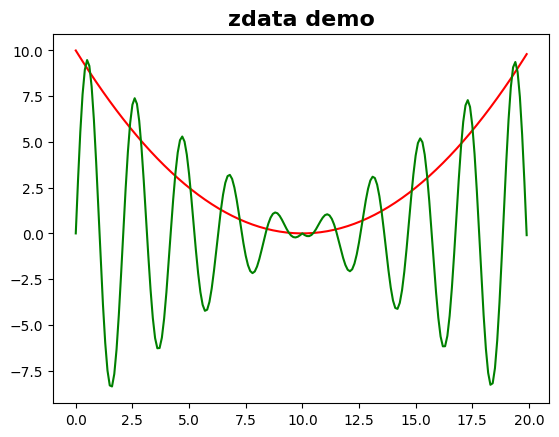

In [152]:
#plot
plot(C.x,C.y1,'r-')
plot(C.x,C.y2,'g-')
title(C.title,fontsize=16,fontweight='bold')


## **4.2. database format in pylib**
In order to conveniently analyze different observational data, we normally first **download all the data files**, and **processe** and **save** all data into one or several *.npz files.

In [153]:
#Example 4.2.1
#usage: working with database in pylibs

#load the entire USGS' water quality database in San Francisco Bay
C=read('SFBayWQ_USGS.npz') #read will use loadz based on file extension

#C.INFO gather all the data contained in SFBayWQ_USGS.npz
C.INFO

['data  : array(1239859,), float64',
 'depth : array(1239859,), float64',
 'lat   : dict(61,)',
 'lon   : dict(61,)',
 'station: array(1239859,), float64',
 'time  : array(1239859,), float64',
 'units : dict(14,)',
 'var   : array(1239859,), <U8']

In [154]:
#view all stations
print('stations: ', unique(C.station))

#view all variables
print('variables: ', unique(C.var))

#note (demo on how to search the database)

stations:  [  1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
  12.5  13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   33.   33.5  34.   35.   36.  405.  407.
 411.  649.  650.  651.  652.  653.  654.  655.  657.  659.  662. ]
variables:  ['DO' 'DO_cmpt' 'Ke' 'NH4' 'NO2' 'NO23' 'PO4' 'SPM' 'SPM_cmpt' 'SiO4'
 'chl' 'chl_cmpt' 'salt' 'temp']


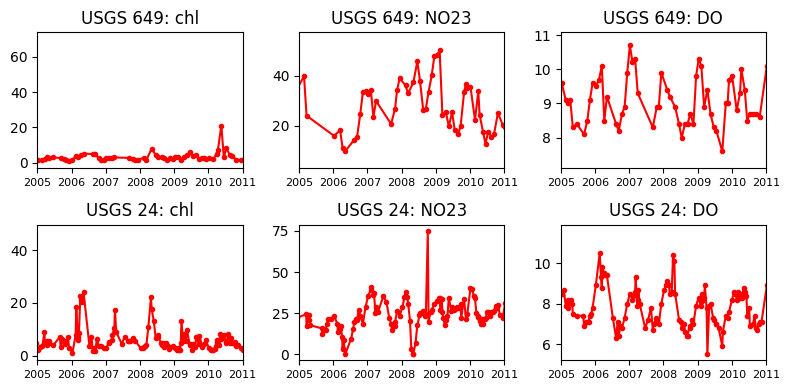

In [155]:
#Example 4.2.2
#plot near-surface DO, CHLA and NO23

#input
stations=[649, 24]
svars=['chl','NO23','DO']

# plot
figure(figsize=[8,4])
xts,xls=get_xtick()
for m,station in enumerate(stations):
  for i, svar in enumerate(svars):
    #search the database
    fp=(C.station==station)*(C.var==svar)*(C.depth<=2)
    oti=C.time[fp]; oyi=C.data[fp]
    sind=argsort(oti); oti,oyi=oti[sind],oyi[sind]

    #plot
    subplot(2,3,m*3+i+1)
    plot(oti,oyi,'r.-')

    #annotation
    setp(gca(),xticks=xts,xticklabels=xls)
    setp(gca(),xlim=[datenum(2005,1,1),datenum(2011,1,1)])
    xticks(fontsize=8)
    title('USGS {}: {}'.format(station,svar))
gcf().tight_layout()

## **4.3 time manipulation**
In pylibs, the datenum starts from **'0000-12-31'** (mpl.dates.get_epoch()).

  * **datenum**: convert date-time to a date number
  * **get_xtick**: generate xticks and xticklables for plotting
  * **find_cs**: use to identily locations of data gaps in a time series
  * **daytime_length**: compute daytime length based on latitude and day_of_year


In [156]:
#Example 4.3.1
#usage of datenum

#convert date to datenum
t1=datenum(2021,4,3,12,30,20)

#convert datenum to datetime object
t2=num2date(t1)

#convet datetime object to string
#tips: use get_xtick? to find the format
t3=t2.strftime('%Y-%m-%d, %H:%M:%S')

#convert date string to number
t4=datenum(t3)

#convert a list of date strings/numbers
t5=datenum(['2000-01-01','2021-04-03'])
t6=datenum([[2000,1,1],[2021,4,3]])

#print
print('t1: ', t1)
print('t2: ', t2)
print('t3: ', t3)
print('t4: ', t4)
print('t5: ', t5)
print('t6: ', t6)

t1:  737883.5210648148
t2:  2021-04-03 12:30:20+00:00
t3:  2021-04-03, 12:30:20
t4:  737883.5210648148
t5:  [730120. 737883.]
t6:  [730120. 737883.]


In [157]:
#Example 4.3.2
#usage of get_xtick

#method 1:  for year
xts,xls=get_xtick()
# xts,xls=get_xtick(xts=[1950,1980])
print('\n year'); print(array(xts)); print(array(xls))

#method 2: for month
xts,xls=get_xtick(fmt=1,xts=[2000,2001],str='%b')
xls[0]='2000'; xls[12]='2001'
print('\n month: \n ',xts[::2],'\n',xls[::2])

#method 3: for day
xts,xls=get_xtick(fmt=2,xts=[datenum(2000,2,1),datenum(2000,3,1)],str='%d/%b')
print('\nday: '); print(xts[::5]); print(xls[::5])


 year
[730120. 730486. 730851. 731216. 731581. 731947. 732312. 732677. 733042.
 733408. 733773. 734138. 734503. 734869. 735234. 735599. 735964. 736330.
 736695. 737060. 737425. 737791. 738156. 738521. 738886.]
['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022' '2023' '2024']

 month: 
  [730120. 730180. 730241. 730302. 730364. 730425. 730486. 730545. 730606.
 730667. 730729. 730790.] 
 ['2000', 'Mar', 'May', 'Jul', 'Sep', 'Nov', '2001', 'Mar', 'May', 'Jul', 'Sep', 'Nov']

day: 
[730151.0, 730156.0, 730161.0, 730166.0, 730171.0, 730176.0]
['01/Feb', '06/Feb', '11/Feb', '16/Feb', '21/Feb', '26/Feb']


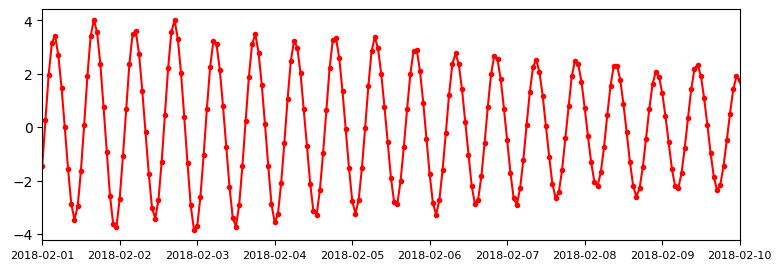

In [158]:
#Example 4.3.3
#usage: plot with get_xtick

#load noaa elev database for Gulf of Maine stations
C=read('noaa_elev.npz')

#get data at noaa station 8410140
fp=(C.station==8410140)*(C.time>=datenum(2018,2,1))*(C.time<datenum(2018,3,1))
oti,oyi=C.time[fp],C.elev[fp]

#plot elevation data
figure(figsize=[9,3])
xts,xls=get_xtick(fmt=2,xts=[datenum(2018,2,1),datenum(2018,3,1)],str='%Y-%m-%d')

plot(oti,oyi,'r.-')
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2018,2,1),datenum(2018,2,10)]);
xticks(fontsize=8);

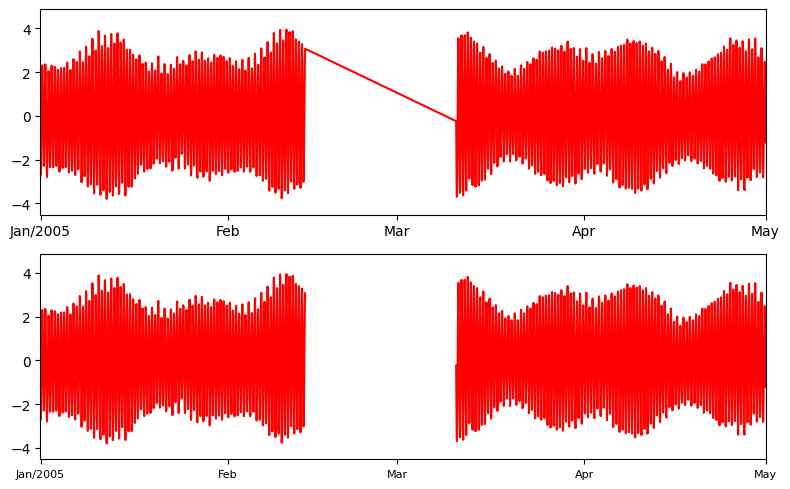

In [159]:
#Example 4.3.4
#usage: for find_cs

#get data at noaa station 8410140
fp=(C.station==8410140)
oti,oyi=C.time[fp],C.elev[fp]
sind=argsort(oti); oti,oyi=oti[sind],oyi[sind]

#find data gap
cs=find_cs(oti,1)
num2date(cs.gaps)

#plot data gap
xts,xls=get_xtick(fmt=1,xts=[2005,2005]); xls[0]=xls[0]+'/2005'

figure(figsize=[8,5])

subplot(2,1,1)
plot(oti,oyi,'r-')
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2005,1,1),datenum(2005,5,1)])

#remove the line in data gap
subplot(2,1,2)
soti=r_[oti,datenum(2005,3,1)]; soyi=r_[oyi,nan]
sind=argsort(soti); soti,soyi=soti[sind],soyi[sind]
plot(soti,soyi,'r-')
xticks(fontsize=8)
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2005,1,1),datenum(2005,5,1)])

gcf().tight_layout()

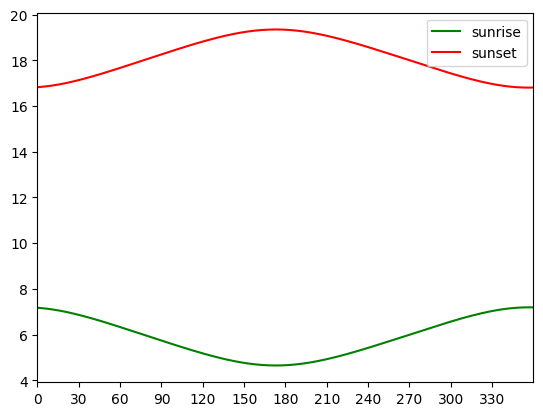

In [160]:
#Example 4.3.5
#usage of daytime_length

#plot the sunrise and sunset at Lat=35
doy=arange(1,366)
dtime=daytime_length(37,doy)
t1,t2=12-dtime/2,12+dtime/2

plot(doy,t1,'g-',doy,t2,'r-')
legend(['sunrise','sunset'])
setp(gca(),xticks=arange(0,360,30),xlim=[0,360]);

## **4.4. data analysis**


### **read and process ASCII files**


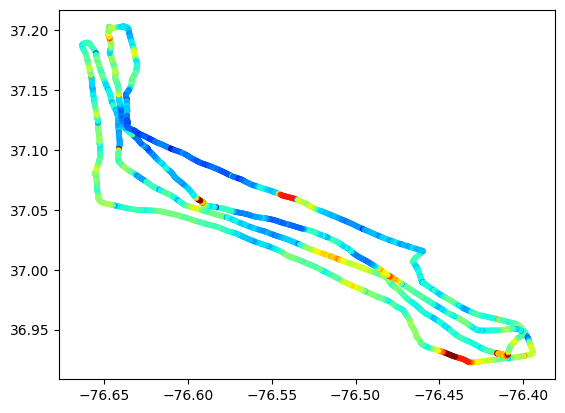

In [161]:
#Example 4.4.1

#read noaa_elev_station.bp to get (x,y,station)
x,y,station=array([i.strip().replace('!','').split() for i in open('noaa_elev_station.bp','r').readlines()[2:]]).T[array([1,2,4])]
x,y=x.astype('float'),y.astype('float')
# print(x,y,station)

#read dataflow file JMSMH_10122020.csv to get (time,xy, chl)
# open('JMSMH_10122020.csv','r').readline().split(',').index('TCHL_PRE_CAL')
fdata=array([i.split(',') for i in open('JMSMH_10122020.csv','r').readlines()[1:]]).T
mtime=datenum(fdata[3]); lat,lon,chl=fdata[array([9,10,61])].astype('float')

#plot chl
scatter(lon,lat,s=10,c=chl,vmin=0,vmax=10)


### low/band pass filters,  running smooth
* **lpfilt**: low-pass filter
* **bpfilt**: band-pass filter
* **smooth**: smooth function

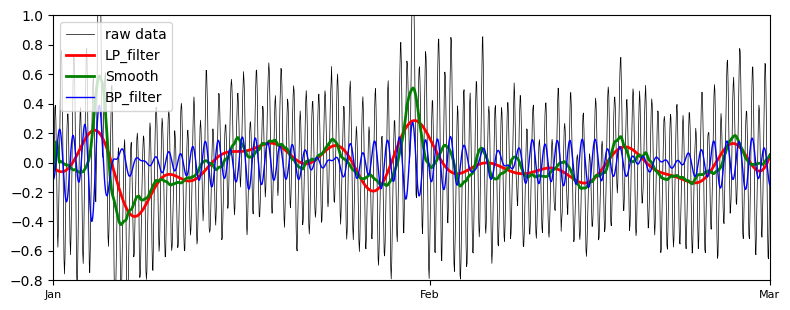

In [162]:
#Example 4.4.2
#lpfilt and smooth
C=read('noaa_elev.npz')

#get data at noaa station 8410140
fp=(C.station==8449130)*(C.time>=datenum(2018,1,1))*(C.time<datenum(2018,4,1))
oti,oyi=C.time[fp],C.elev[fp]

#plot elevation data
figure(figsize=[8,6])
xts,xls=get_xtick(fmt=1,xts=[2018,2018],str='%b')

#low-pass filter time series
foyi=lpfilt(oyi,1/24,0.2)

#smooth time series
soyi=smooth(oyi,24)

#band-pass filter time series
boyi=bpfilt(oyi,1/24,[0.5, 1])

#plot
subplot(2,1,1)
plot(oti,oyi,'k-',lw=0.5)
plot(oti,foyi,'r',lw=2)
plot(oti,soyi,'g',lw=2)
plot(oti,boyi,'b',lw=1)

legend(['raw data','LP_filter','Smooth','BP_filter'],loc=2,fontsize=10)
xticks(fontsize=8)
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2018,1,1),datenum(2018,3,1)],ylim=[-0.8,1.0])

gcf().tight_layout()

### FFT
* **mfft**: Perform FFT for a time series

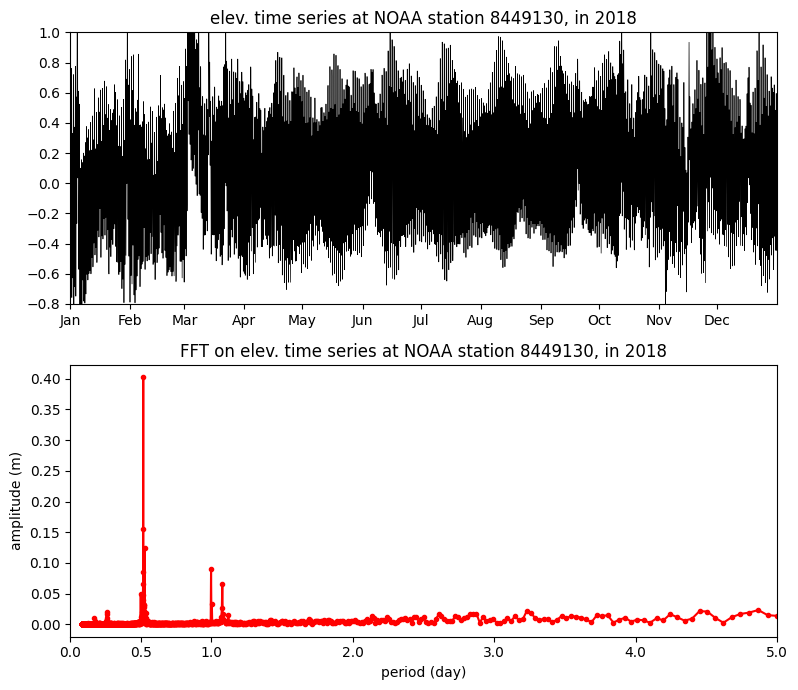

In [163]:
#Example 4.4.3

#get data at noaa station 8410140
fp=(C.station==8449130)*(C.time>=datenum(2018,1,1))*(C.time<datenum(2019,1,1))
oti,oyi=C.time[fp],C.elev[fp]

Period,Amp,Phase=mfft(oyi,1/24)

#plot
figure(figsize=[8,7])

subplot(2,1,1)
xts,xls=get_xtick(fmt=1,xts=[2018,2018],str='%b')
plot(oti,oyi,'k-',lw=0.5)
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2018,1,1),datenum(2019,1,1)],ylim=[-0.8,1.0])
title('elev. time series at NOAA station 8449130, in 2018');

subplot(2,1,2)
plot(Period, Amp,'r.-')
setp(gca(),xticks=[0,0.5,*arange(1,6)],xlim=[0,5]);
xlabel('period (day)'); ylabel('amplitude (m)')
title('FFT on elev. time series at NOAA station 8449130, in 2018');
gcf().tight_layout()

### **statistics**
* **get_stat**: return frequently used statistics

Text([-0.44], [0.36], 'RMSD=0.168')

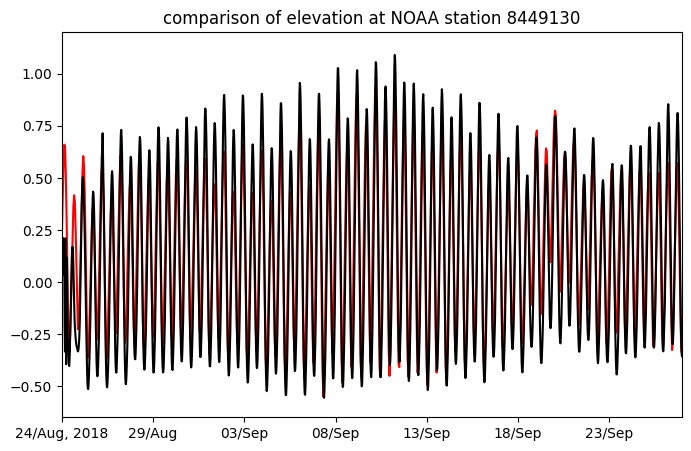

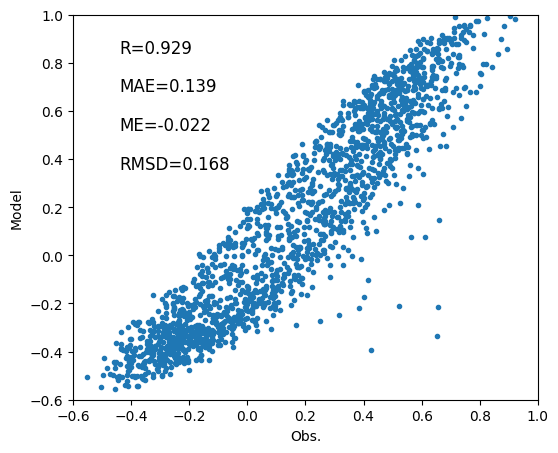

In [164]:
#Example 4.4.4
#usage: plot obs versus model with statistics

#read model results; starting date is 2018-8-24
fd=loadtxt('elev_model.dat').T
mti=fd[0]+datenum(2018,8,24); fd=fd[1:]

#get time series of simulation at station 8449130
bp=read('noaa_elev_station.bp')
sid=nonzero(bp.station=='8449130')[0][0]
myi=fd[sid]

#get time series of obs. at station 8449130
fp=(C.station==8449130)*(C.time>=datenum(2018,8,23))*(C.time<datenum(2018,10,1))
oti,oyi=C.time[fp],C.elev[fp]

#plot
xts,xls=get_xtick(fmt=2,xts=[datenum(2018,8,24),datenum(2018,10,1)],str='%d/%b')
xts,xls=xts[::5],xls[::5]; xls[0]=xls[0]+', 2018'

figure(figsize=[8,5])
plot(oti,oyi,'r-',mti,myi,'k-')
setp(gca(),xticks=xts,xticklabels=xls,xlim=[datenum(2018,8,24),datenum(2018,9,27)], ylim=[-0.65,1.2]);
title('comparison of elevation at NOAA station 8449130');

figure(figsize=[6,5])
#plot with statistical data
xm=[-0.6,1]; ym=[-0.6,1]
soyi=interpolate.interp1d(oti,oyi)(mti)
st=get_stat(myi,soyi)
plot(soyi,myi,'.')
xlabel('Obs.'); ylabel('Model')
setp(gca(),xlim=xm,ylim=ym)

#stat data
text(xm[0]+0.1*diff(xm),ym[0]+0.9*diff(ym),'R={:0.3f}'.format(st.R),fontsize=12)
text(xm[0]+0.1*diff(xm),ym[0]+0.8*diff(ym),'MAE={:0.3f}'.format(st.MAE),fontsize=12)
text(xm[0]+0.1*diff(xm),ym[0]+0.7*diff(ym),'ME={:0.3f}'.format(st.ME),fontsize=12)
text(xm[0]+0.1*diff(xm),ym[0]+0.6*diff(ym),'RMSD={:0.3f}'.format(st.RMSD),fontsize=12)

### **least square fit**
* **lsq**: perform least square fit (alias to least_square_fit)

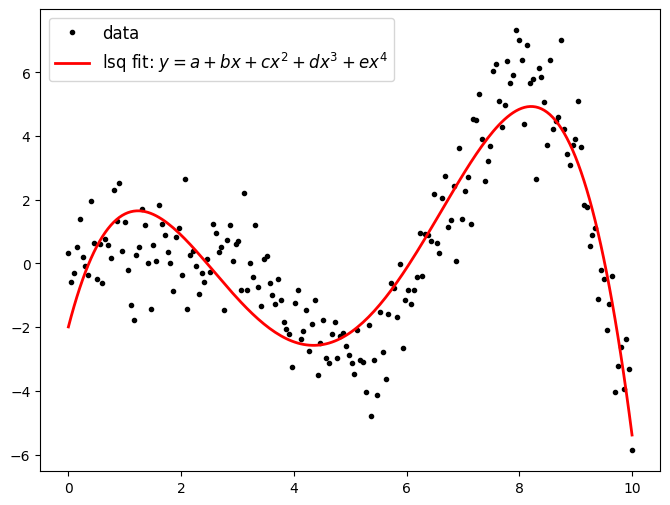

In [165]:
#Example 4.4.5

#fake some data
npt=200; x=linspace(0,10,npt)
y=randn(npt)+abs(x-2)*sin(x)

#use function y=a+b*x+c*x^2+d*x^3+e*x^4 to fit the data
AA=c_[ones(npt),x,x**2,x**3,x**4]
# AA=c_[ones(npt),x,x**2,x**3,x**4,x**5,x**6,x**7,x**8] #try much higher polynomial
CC,fy=lsq(AA,y)

#plot
figure(figsize=[8,6])
plot(x,y,'k.')
plot(x,fy,'r',lw=2)
legend(['data',r'lsq fit: $y=a+bx+cx^2+dx^3+ex^4$'],loc=2,fontsize=12)

### **EOF**
* **EOF**: perform Empirical Orthogonal Function analysis

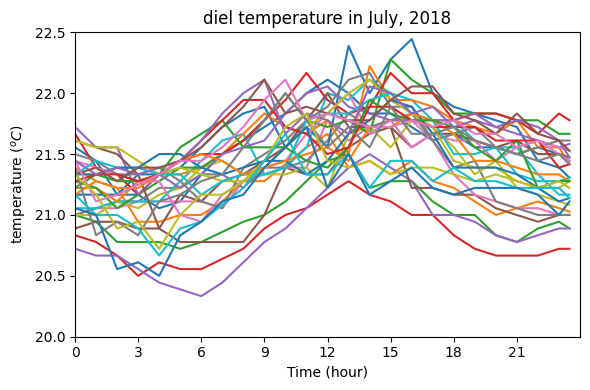

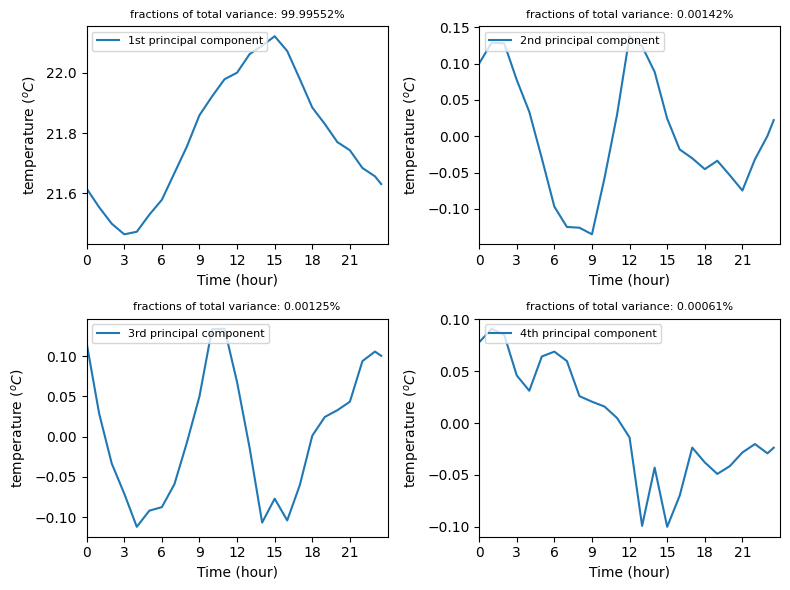

In [166]:
#Example 4.4.5

#read San Francisco Bay temp in July, 2018
C=loadz('SFBay_temp.npz')

#plot diel temperature in July, 2018
figure(figsize=[6,4])
plot(C.hour,C.temp.T)
setp(gca(),xticks=arange(0,24,3),yticks=arange(20,23,0.5),xlim=[0,24],ylim=[20,22.5])
xlabel('Time (hour)'); ylabel(r'temperature $(^{o}C$)')
title('diel temperature in July, 2018')
gcf().tight_layout();

#EOF analysis
(PC,CC,VC,solver)=EOF(C.temp,4)

figure(figsize=[8,6])
tags=['1st','2nd','3rd','4th']
for i in arange(4):
    subplot(2,2,i+1)
    plot(C.hour,PC[i])
    setp(gca(),xticks=arange(0,24,3),xlim=[0,24])
    xlabel('Time (hour)'); ylabel(r'temperature $(^{o}C$)')
    legend(['{} principal component'.format(tags[i])],loc=2,fontsize=8)
    title('fractions of total variance: {:0.5f}%'.format(100*VC[i]),fontsize=8)
gcf().tight_layout()

## **4.5. harmonic analysis**
At present, HA is driven by "tidal_analysis.c". In the future, we may use ttide or utide (python version) to get rid of this dependency
  * **harmonic_analysis**: get tidal harmonic consituents from time sereis
  * **harmonic_fit**: use harmonic consituents to compute time series

  (note, maybe a demo on sciclone)

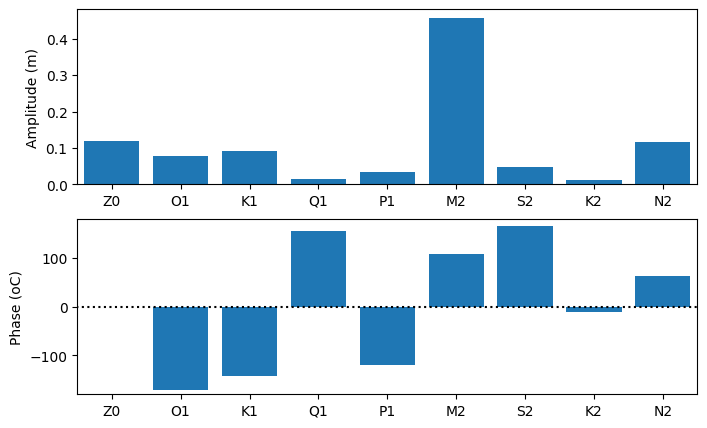

In [167]:
#compile code (only needed to be done once)
sdir=os.path.dirname(mylib.__file__)+'/../pyScripts/Harmonic_Analysis'
os.system('cd {}; gcc tidal_analysis.c nrutil.c -lm; mv a.out tidal_analyze'.format(sdir))

#get data
C=read('noaa_elev.npz')
fp=(C.station==8449130)*(C.time>=datenum(2018,1,1))*(C.time<datenum(2019,1,1))
oti,oyi=C.time[fp],C.elev[fp]
mti=arange(oti.min(),oti.max(),1/24); myi=interpolate.interp1d(oti,oyi)(mti)

#perform harmonic analysis
H=harmonic_analysis(myi,1/24)

#plot amplitude and phase
figure(figsize=[8,5]); xi=arange(9)
subplot(2,1,1)
bar(xi,H.amplitude);
setp(gca(),xticks=xi,xticklabels=H.tidal_name,xlim=[-0.5,8.5]);
ylabel('Amplitude (m)')

subplot(2,1,2)
bar(xi,H.phase*180/pi); plot([-10,10],[0,0],'k:')
setp(gca(),xticks=xi,xticklabels=H.tidal_name,ylim=[-180,180],xlim=[-0.5,8.5]);
ylabel('Phase (oC)');

## **4.6. netcdf**
These two functions are used to handle netcdf format
  * **ReadNC**: read netcdf file content as zdata format
  * **WriteNC**: write netcdf file content

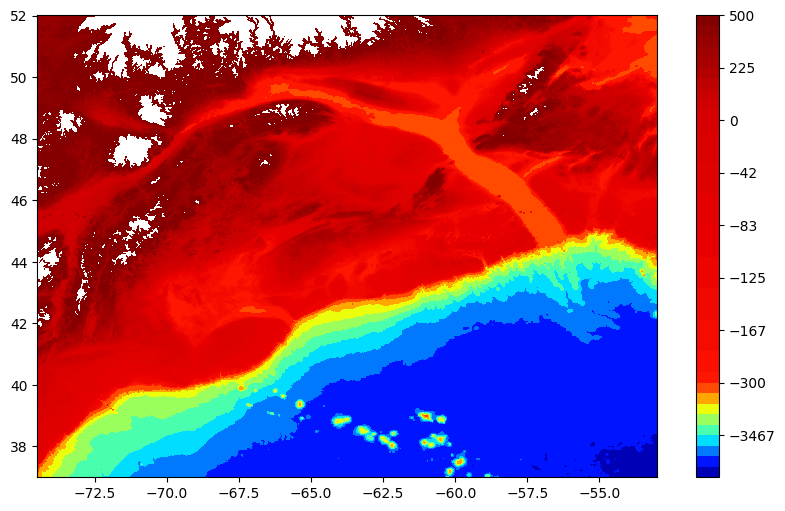

In [168]:
#Example 4.6.1
#usage of ReadNC
#GEBCO.nc is the DEM file around Gulf of Maine region

#-----------------------------------------------------
#method 1: read all the information of netcdf files
#      (including all attributes and dimension information)
#-----------------------------------------------------
C=ReadNC('GEBCO.nc')
# C.INFO #show variable informat

#get variable values
x=array(C.lon.val) # Note: array will convert the data to be a numpy array
y=array(C.lat.val)
elev=array(C.elev.val)

#-----------------------------------------------------
#method 2: real all variables, and convert them to numpy array
#-----------------------------------------------------
C=ReadNC('GEBCO.nc',2)
# # C.INFO #show variable informat

#get variable values of numpy arrays
x,y,elev=C.lon,C.lat,C.elev

#-----------------------------------------------------
#method 3: open file channel first, and read variables later
#-----------------------------------------------------
C=ReadNC('GEBCO.nc',1)
# svars=[*C.variables] #show variable informat
# svars=[*C.dimensions] #show variable informat

#get variable values
x=array(C.variables['lon'][:])
y=array(C.variables['lat'][:])
elev=array(C.variables['elev'][:])
C.close()

#-----------------------------------------------------
#plot DEM
#-----------------------------------------------------
levels=[*linspace(-6000,-300,10),*linspace(-200,0,25),*linspace(5,500,10)]
figure(figsize=[10,6]); set_cmap('jet')
contourf(x,y,elev,levels=levels,vmin=-6e3,vmax=500)
colorbar()

file_format: "NETCDF4", string
dimname: list['X-Axis', 'Y-Axis']
dims  : array([100 200]), int64
dim_unlimited: list(2,)
attrs : list(3,)
vars  : array(3,), <U1
x     : array(100,), float64
y     : array(200,), float64
z     : array(200, 100), float64


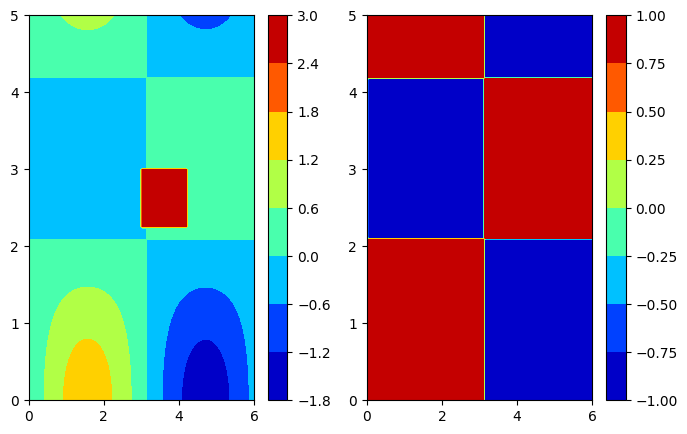

In [169]:
#Example 4.6.2
#usage of WriteNC

#fake some data for preparing netcdf file
x=linspace(0,6,100); y=linspace(0,5,200);
z=sin(x[None,:])*(cos(y[:,None])+0.5)
# contourf(x,y,z,levels=100); colorbar() #plots

#-------------------------------------------------------------------------------
#method 1: create a netcdf file
#-------------------------------------------------------------------------------
#create a new netcdf files
C=zdata()
C.a='a'             #add a string
C.b=1               #add a integer
C.c=2.0             #add a float
C.d=[1,'a','b']     #add a list
C.x, C.y, C.z=x,y,z #add variables of data array
WriteNC('netcdf_sample.nc',C)
# print('\n'.join(read('data/netcdf_sample.nc').INFO))

#-------------------------------------------------------------------------------
#method 2: create a netcdf file with defined dimension information
#-------------------------------------------------------------------------------
#create a new netcdf files
C=zdata()     #open a data capsule
C.dimname=['X-Axis','Y-Axis']; C.dims=[100,200]  #define dimensions
# C.file_format='NETCDF4'  #optional
# C.note='netcdf examples' #optional

#add variables x and y
vi=zdata(); vi.dimname=['X-Axis']; vi.val=x; C.x=vi
vi=zdata(); vi.dimname=['Y-Axis']; vi.val=y; C.y=vi

#add variable z with more information
vi=zdata(); vi.dimname=['Y-Axis','X-Axis'] #dimension
vi.attrs=['note','size']; vi.note='this is the attribute of data'; vi.size=z.size #add attributes
vi.val=z; C.z=vi #add values

#write netcdf
WriteNC('netcdf_sample.nc',C)
print('\n'.join(read('netcdf_sample.nc').INFO))

#-------------------------------------------------------------------------------
#method 3: modify a netcdf file
#-------------------------------------------------------------------------------
C=ReadNC('netcdf_sample.nc')         #read data
C.z.val=sign(C.z.val)                     #modify value
WriteNC('netcdf_sample_modify.nc',C) #write a new file

#-------------------------------------------------------------------------------
#method 4: modify a netcdf file in situ: can be useful when dealing with large-size files
#-------------------------------------------------------------------------------
C=ReadNC('netcdf_sample.nc',fmt=1,mode='r+')
C.variables['z'][90:120:,50:70]=3
C.close()

#-------------------------------------------------------------------------------
#plot files
#-------------------------------------------------------------------------------
C1=ReadNC('netcdf_sample.nc',2)
C2=ReadNC('netcdf_sample_modify.nc',2)

figure(figsize=[8,5])
subplot(1,2,1)
contourf(C1.x,C1.y,C1.z); colorbar()

subplot(1,2,2)
contourf(C2.x,C2.y,C2.z); colorbar()


## **4.7 projection**
  * **proj**: convert coordinates between different projections
  * **proj_pts**: convert coordinates of points between different projections
  * **get_prj_file**: get string of projection file (*.prj)

In [170]:
#Example 4.7.1: proj_pts

#read some coordinate data in UTM18N ('epsg:4326')
gd=read('hgrid.gr3'); px,py=gd.x,gd.y

#transform coordinates
lx,ly=proj_pts(px,py,'epsg:26918','epsg:4326') #from UTM-18N to lon&lat
sx,sy=proj_pts(lx,ly,'epsg:4326','epsg:26918') #from lon &lat to UTM-18N
print(c_[px,py,lx,ly,sx,sy][:3])

#transfrom from an unknown projections (full),
prj_unkown=get_prj_file('epsg:26918')
lx,ly=proj_pts(px,py,prj_unknown,'epsg:4326') #from prj_unknow to lon&lat


[[ 3.69732393e+05  4.22091269e+06 -7.64862510e+01  3.81266695e+01
   3.69732393e+05  4.22091269e+06]
 [ 3.71095024e+05  4.22058453e+06 -7.64706499e+01  3.81239085e+01
   3.71095024e+05  4.22058453e+06]
 [ 3.70866700e+05  4.22187600e+06 -7.64734879e+01  3.81355116e+01
   3.70866700e+05  4.22187600e+06]]


In [171]:
#Example 4.7.2:  proj  (related to SCHISM )
#tranform SCHISM grid
proj('hgrid.gr3',0,'epsg:26918','hgrid.ll',0,'epsg:4326')

#tranform ACE/gredit bpfile
proj('noaa_elev_station.bp',1,'epsg:4326','noaa_elev_station_utm.bp',1,'epsg:26918')

## **4.8 shapefile**
The two functions below are used to deal with shapefile. At present, they can handle three types of geometry data: POINT, LINE, POLYGON
  * **read_shp**: read shapefile as zdata format  (alias to write_shapefile_data)
  * **write_shp**: write shapefile (alias to write_shapefile_data)


In [172]:
#Example 4.8.1
#usage of write_shp

#grab some stations data
bp=read('noaa_elev_station_utm.bp')
bx, by=bp.x, bp.y; station=bp.station; station_id=arange(len(bx))+1

#write a shapefile
C=zdata()                                    #get a data capsule
C.type='POINT'                               #define type
C.prj='epsg:26918'                           #define projection
C.xy=c_[bx,by]                               #coordinates of points
C.attname=['station','station_id']           #add attribute names
C.attvalue=array([station,station_id],dtype='O') #add attribute values
write_shp('noaa_elev_station',C)  #write shapefile

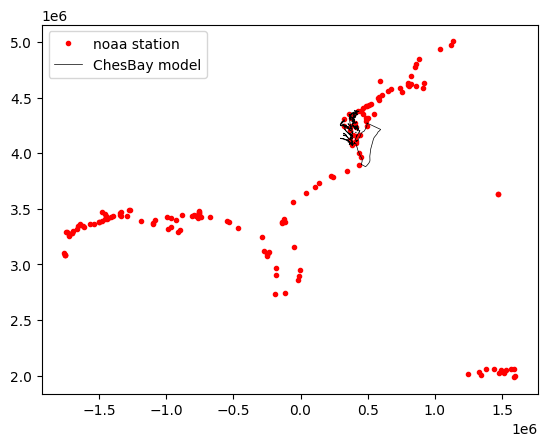

In [173]:
#Example 4.8.2
#usage of read_shapefile_data

#read data
C=read_shp('noaa_elev_station.shp')
px,py=C.xy.T  #get station coordinate

#plot points read from shapefile
plot(px,py,'r.')
read('hgrid.gr3').plot_bnd()  #plot ChesBay model boundary
legend(['noaa station','ChesBay model'])


## **4.9 geometry related**
  * **inside_polygon**: identify the points inside a polygon
  * **near_pts**: find the indices of nearest points


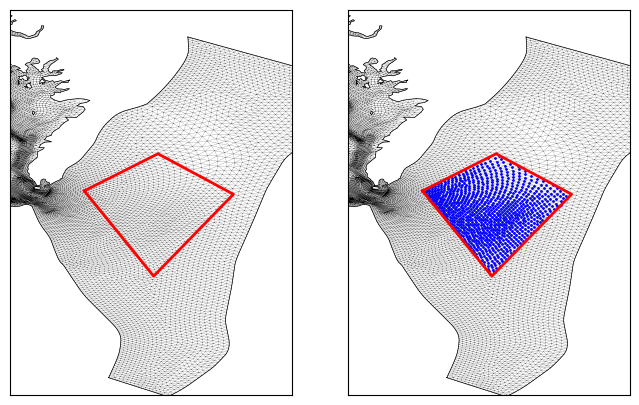

In [174]:
#Example 4.9.1
#usgae of inside_polygon

#read reg and points
gd=read('hgrid.gr3');  px, py=gd.x, gd.y
reg=read('CS.reg');     rx, ry=reg.x, reg.y

#find the points inside region
fp=inside_polygon(c_[px,py],rx,ry)==1  #boolean value for each points
sindp=nonzero(fp)[0]                   #indices of points inside region
# sindp=nonzero(inside_polygon(c_[px,py],rx,ry)==1)[0]  #this is a better way

#plots
cx,cy=close_data_loop(c_[rx,ry]).T
figure(figsize=[8,5])

subplot(1,2,1)
gd.plot(lw=0.1); gd.plot_bnd(c='k') #plot grid boundary
plot(cx,cy,'r',lw=2)
setp(gca(),xlim=[4e5,5.5e5],ylim=[3.88e6,4.3e6],xticks=[],yticks=[]);

subplot(1,2,2)
gd.plot(lw=0.1); gd.plot_bnd(c='k') #plot grid boundary
plot(px[sindp],py[sindp],'b.',ms=2)
plot(cx,cy,'r',lw=2)
setp(gca(),xlim=[4e5,5.5e5],ylim=[3.88e6,4.3e6],xticks=[],yticks=[]);

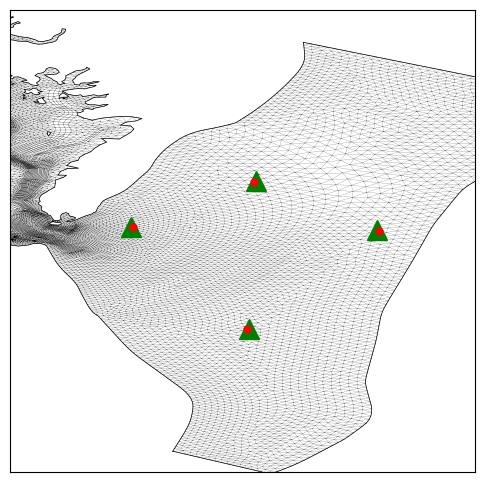

In [175]:
#Example 4.9.2
#usgae of near_pts

#read points
gd=read('hgrid.gr3');  px, py=gd.x, gd.y
reg=read('CS.reg');     rx, ry=reg.x, reg.y

#find nearest points of (bp.x, bp.y)
sindp=near_pts(c_[rx,ry],c_[px,py])

#plots
figure(figsize=[6,6])
gd.plot(lw=0.1); gd.plot_bnd(c='k') #plot grid boundary
plot(px[sindp], py[sindp],'g^',ms=14)
plot(rx,ry,'r.',ms=10)
setp(gca(),xlim=[4e5,5.5e5],ylim=[3.88e6,4.3e6],xticks=[],yticks=[]);

## **4.10 DEM related**
The first two functions below are used to interpolated DEM data to points.
  * **convert_dem_format**: convert DEM file in *.asc format to *.npz format
  * **load_bathymetry**: interoplated DEM data to points
  * **compute_contour**: extract contours from a 2D data

extracting contours in subdomain: 1/1


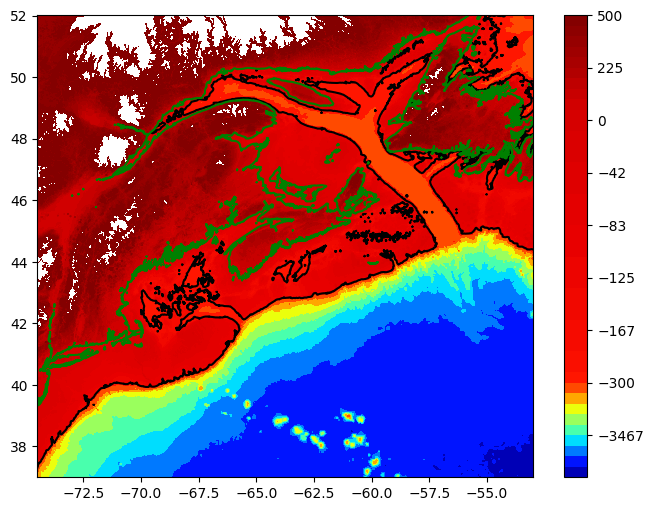

In [176]:
#Example 4.10.1
#usgae of compute_contour

#read DEM data
C=ReadNC('GEBCO.nc',2)

#compute contours
levels=[-200,0]
S=compute_contour(C.lon,C.lat,C.elev,levels,fname='GEBCO_contour')

#plots contour lines
levels=[*linspace(-6000,-300,10),*linspace(-200,0,25),*linspace(5,500,10)]
figure(figsize=[8,6]); set_cmap('jet')
contourf(C.lon,C.lat,C.elev,levels=levels,vmin=-6e3,vmax=500)
x,y=S.xy[0].T; plot(x,y,'k-')
x,y=S.xy[1].T; plot(x,y,'g-')
colorbar()

## **4.11. plot**
  * **plot_taylor_diagram**: a function to play taylor diagram
  * **get_subplot_position**: get axes of subplots
  * **move_figure**: move figure to certain position


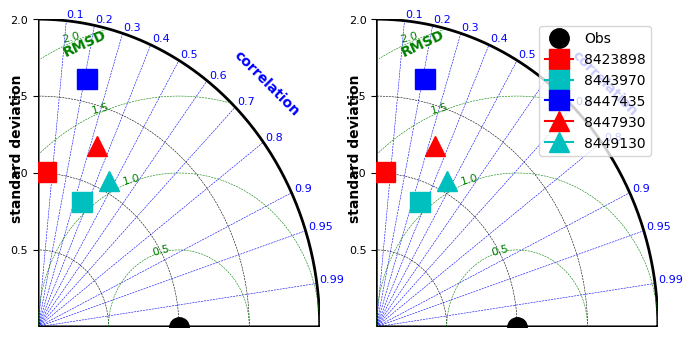

In [177]:
#Example 4.11.1
#usage of plot_talyor diagram

#read station info.
bp=read('noaa_elev_station.bp')

#load noaa elev database for Gulf of Maine stations
C=read('noaa_elev.npz')
stations=unique(C.station) #[i for i in unique(C.station) if i in bp.station.astype('int')]

#read model results; starting date is 2018-8-24
fd=loadtxt('elev_model.dat')
mti=fd[:,0]+datenum(2018,8,24); fd=fd[:,1:]

#get time series of simulation at stations and statistics
tp_data=[]
for m,station in enumerate(stations):
  sid=nonzero(bp.station=='{}'.format(station))[0][0]
  myi=fd[:,sid] #model
  soyi=interpolate.interp1d(oti,oyi)(mti) #obs

  fmyi=lpfilt(myi,1/48,0.5); foyi=lpfilt(soyi,1/48,0.5)

  #save stat
  C=get_stat(fmyi,foyi)
  tp_data.append(C.taylor)

#get normalized RMSD, STD and R
tp_data=array(tp_data)
STD,RMSD,R=tp_data.T

#only keep positive R
fp=R>0; STD,R,stations=STD[fp],R[fp],stations[fp]

#plot taylor diagram
figure(figsize=[8,4])
cs=['r','c','b']; ms=['s','^','o']

#method 1
subplot(1,2,1)
ha=plot_taylor_diagram(R,STD)
plot(1,0,'ko',markersize=14)

#set point style
for m,station in enumerate(stations):
  setp(ha.hp[m],color=cs[m%3],marker=ms[int(m/3)],ms=14)

#method 2
subplot(1,2,2)
ha=plot_taylor_diagram()
plot(1,0,'ko',markersize=14,label='Obs')

#set point style
for m,station in enumerate(stations):
  ri,stdi=R[m],STD[m]
  plot(stdi*ri,stdi*sqrt(1-ri**2),marker=ms[int(m/3)],color=cs[m%3],ms=14,label=station)
hl=legend()

## **4.12 excel**

* **write_excel**: write excel files
* **read_excel**:  read excel files


In [178]:
#Example 4.12: write_excel, and read_excel

#read noaa_elev_station.bp to get (x,y,station)
x,y,station=array([i.strip().replace('!','').split() for i in open('noaa_elev_station.bp','r').readlines()[2:]]).T[array([1,2,4])]
data=r_[array(['station','lon','lat'])[None,:],c_[station,x,y]]
write_excel('noaa_elev_station',data)

#read excel file just created
header,fd=read_excel('noaa_elev_station.xlsx',fmt=1)
# station,x,y=fd.T

## **4.13. misc**
  * **rewrite**: function to rewrite file in-situ based on conditions
  * **rewrite_input**: function to rewrite the inputs in job-submit scripts
  * **read_yaml**: read parameter in yaml file
  * **mdivide**: perform matrix division B/A
  * **signa**: compute signed area for triangles
  * **close_data_loop**: if xi[0,...]!=xi[-1,...], then,add xi[0,...] in the end
  * **convert_matfile**: convert matlab file (*.mat) to zdata (*.npz)
  * **get_hycom**: extract Hycom time series at stations (maybe outdated)


In [179]:
#Example 4.13.1
#usage of rewite

#copy file (not to rewrite the original files)
!cp SCHISM.local.build  old.txt
!cp SCHISM.local.build  new.txt

#write file in-site
fname='new.txt'

modules=['COSINE']
rewrite(fname,replace=['ON','OFF'],include=['USE_','PREC_EVAP','OLDIO'])
rewrite(fname,replace=['OFF','ON'],include=[i if i in ['OLDIO','PREC_EVAP'] else 'USE_{}'.format(i) for i in modules])
rewrite(fname,replace=[],include=['FABM_BASE'])
rewrite(fname,append=['set( FABM_BASE /home/... CACHE STRING "Path to FABM base")\n'])

#see different
!diff old.txt new.txt

20c20
< set (OLDIO ON CACHE BOOLEAN "Old nc output (each rank dumps its own data)")
---
> set (OLDIO OFF CACHE BOOLEAN "Old nc output (each rank dumps its own data)")
22c22
< set (PREC_EVAP ON CACHE BOOLEAN "Include precipitation and evaporation calculation")
---
> set (PREC_EVAP OFF CACHE BOOLEAN "Include precipitation and evaporation calculation")
41c41
< set( USE_ICM ON  CACHE BOOLEAN "Use ICM module")
---
> set( USE_ICM OFF  CACHE BOOLEAN "Use ICM module")
44c44
< set( USE_COSINE OFF   CACHE BOOLEAN "Use CoSiNE module")
---
> set( USE_COSINE ON   CACHE BOOLEAN "Use CoSiNE module")
56c56
< set( FABM_BASE /sciclone/home10/wangzg/fabm CACHE STRING "Path to FABM base")
---
> set( FABM_BASE /home/... CACHE STRING "Path to FABM base")


## **4.14 read**

support file format: `npz, gr3, ll, ic, vgrid.in, bp, reg, prop, xlsx, nc, shp, nml, asc, tif, tiff,mat`

The following code shows the file formats that `**read**` can handle based on the extension <br>

    if fname.endswith('.asc') or fname.endswith('.tif') or fname.endswith('.tiff'): F=read_dem
    if fname.endswith('.gr3') or fname.endswith('.ll') or fname.endswith('.ic'): F=read_schism_hgrid
    if fname.endswith('vgrid.in'):  F=read_schism_vgrid
    if fname.endswith('.npz'):  F=loadz
    if fname.endswith('.bp'):   F=read_schism_bpfile
    if fname.endswith('.reg'):  F=read_schism_reg
    if fname.endswith('.prop'): F=read_schism_prop
    if fname.endswith('.xlsx'): F=read_excel
    if fname.endswith('.nc'):   F=ReadNC
    if fname.endswith('.shp'):  F=read_shapefile_data
    if fname.endswith('.nml'):  F=read_schism_param
    if fname.endswith('.mat'):  F=convert_matfile


# **5. schism_file functions/classes**

## **5.1. hgrid**
* **schism_grid**: class of horizontal grid
* **read_schism_hgrid**: read hgrid.gr3, and return object of schism_grid class

In [180]:
#Exmaple 5.1.1
#usage of read_schism_hgrid

#read hgrid about Chesapkeake Bay
gd=read('hgrid.gr3'); gd.compute_all()

#show hgrid attributes
print('Attributes:\n ', '\n  '.join(gd.INFO))

Attributes:
  source_file: "hgrid.gr3", string
  ne    : 41873, int64
  np    : 27075, int64
  x     : array(27075,), float64
  y     : array(27075,), float64
  dp    : array(27075,), float64
  i34   : array(41873,), int64
  elnode: array(41873, 4), int64
  ns    : 68963, int
  nob   : 1, int
  nobn  : 158, array(1), int64
  iobn  : array(1, 158), int64
  nlb   : 17, int
  nlbn  : array(17,), int64
  ilbn  : array(17,), object
  island: array(17,), int64
  xctr  : array(41873,), float64
  yctr  : array(41873,), float64
  dpe   : array(41873,), float64
  area  : array(41873,), float64
  isidenode: array(68963, 2), int64
  isdel : array(68963, 2), int64
  xcj   : array(68963,), float64
  ycj   : array(68963,), float64
  dps   : array(68963,), float64
  distj : array(68963,), float64
  nns   : array(27075,), int64
  ins   : array(27075, 11), int64
  nne   : array(27075,), int64
  mnei  : 11, int64
  ine   : array(27075, 11), int64
  indel : array(27075,), object
  inp   : array(27075,), o

In [181]:
#show hgrid functions
methods=[i for i in dir(gd) if (not i.startswith('__')) and (i not in gd.__dict__)]
print('\n\nMethods:\n ', '\n  '.join(methods))



Methods:
  INFO
  check_quads
  check_skew_elems
  compute_acor
  compute_all
  compute_area
  compute_bnd
  compute_ctr
  compute_gradient
  compute_ic3
  compute_kb
  compute_nne
  compute_node_ball
  compute_side
  create_bnd
  grd2sms
  inside_elem
  inside_grid
  interp
  interp_elem_to_node
  interp_node_to_elem
  plot
  plot_bad_quads
  plot_bnd
  plot_grid
  proj
  query_pt
  read_hgrid
  read_prop
  save
  show_node
  smooth
  split_quads
  split_quads_wwm
  write
  write_bnd
  write_hgrid
  write_prop
  write_shapefile_bnd
  write_shapefile_element
  write_shapefile_node
  write_shp
  z
  zcj
  zctr


### **5.1.1. attributes of hgrid**
***
* **node** <a name="gd_attr"></a>
  * **np** `[1,]`  : numbers of nodes
  * **x**  `[np,]` : x coordinates
  * **y**  `[np,]` : y coordinates
  * **z** or **dp**  `[np,]`  :  depth  
  * **lon** `[np,]`: longitude
  * **lat** `[np,]`: latitude
***

* **element**
  * **ne**     `[1,]`    : numbers of elements
  * **i34**    `[ne,]`   : element types
  * **elnode** `[ne,4]`  : element to node table
  * **xctr**   `[ne,]`   : x coordinate at element center
  * **yctr**   `[ne,]`   : y coordinate at element center
  * **zctr** or **dpe**  `[ne,]` : z coordinate at element center  
  * **area**   `[ne,]`   : element area
  * **elside** `[ne,4]`  : element to side table
  * **ic3**    `[ne,4]`  : element-side-element table
***

* **side**
  * **ns**     `[1,]`    : numbers of sides
  * **xcj**    `[ns,]`   : x coordinate at side center
  * **ycj**    `[ns,]`   : x coordinate at side center
  * **zcj** or **dps**  `[ns,]`   : depth at side center
  * **isidenode**`[ns,2]`: side to node table
  * **isdel**  `[ns,2]`  : side to element table
  * **distj**  `[ns,2]`  : side length
***

* **node ball**
  * **mnei**   `[1,]`    : maximum number of elements in nodal ball
  * **nne**    `[np,]`   : number of elements in nodal ball
  * **ine**:   `[np,mnei]`:element indices for each nodal ball
  * **indel**  `[np,*]`  : element indices for each nodal ball
  * **mnpi**   `[1,]`    : maximum number of nodes in nodal ball (exclude itself)
  * **nnp**:   `[np,]`   : number of nodes in nodal ball
  * **inp**:   `[np,*]`  : node indices for each nodal ball
  * **indnd**: `[np,*]`  : node indices for each nodal ball
  * **nns**:   `[np,]`   : number of sides in nodal ball
  * **ins**:   `[np,mnsi]`: side indices for each nodal ball (mnsi=nns.max())
***

* **bnoundary**
  * **nob**    `[1,]`    : number of open boundary segments
  * **nobn**   `[nob,]`  : number of nodes on each open boundary segment
  * **iobn**   `[nob,*]` : node indices of each open boundary segment
  * **nlb**    `[1,]`    : number of land boundary segments
  * **nlbn**   `[nlb,]`  : number of nodes on each land boundary segment  
  * **ilbn**   `[nlb,*]` : node indices of each land boundary segment
  * **island** `[nlb,]`  : flag for wheter land boundary segment is a enclosed island
***

* **gradient**
  * **dpdx**: gradient along x-axis at node
  * **dpdy**: gradient along y-axis at node
  * **dpdxy**: gradient magnitude at node
  * **dpedx**: gradient along x-axis at element
  * **dpedy**: gradient along y-axis at element
  * **dpedxy**: gradient magnitude at element


### **5.1.2. methods of hgrid**

#### **5.1.2.1. plot**
  * **plot** : plot grid and/or depth (**plot_grid** is an alias)
  * **plot_bnd**: plot grid boundary
  * **plot_bad_quads**: plot locations of bad-quality quads


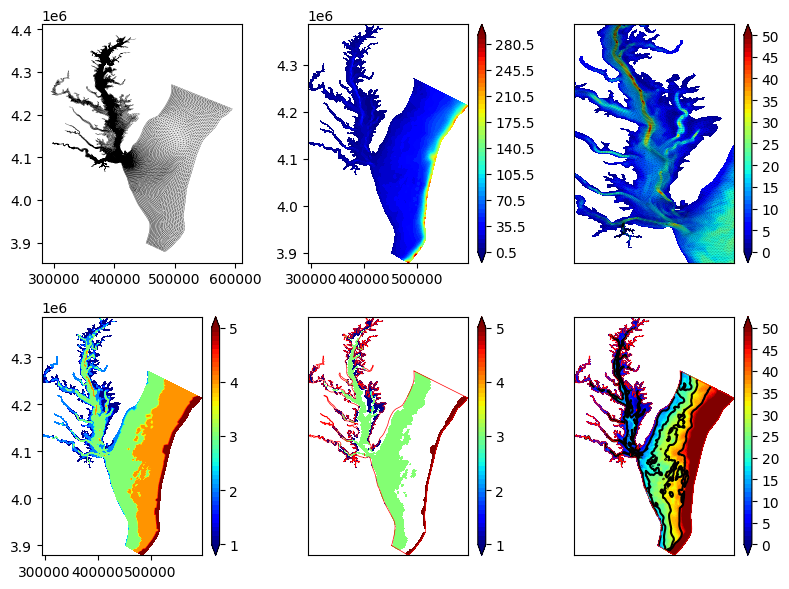

In [182]:
#Examples 5.1.2.1.1
#usage of plot
gd=read('hgrid.gr3')

figure(figsize=[8,6])
#method 1: grid
subplot(2,3,1)
gd.plot()

#method 2: bathymetry
subplot(2,3,2)
gd.plot(fmt=1)

#method 3: combine specifications
subplot(2,3,3)
gd.plot(fmt=1,ec='k',lw=0.05,clim=[0,50],ticks=11)
setp(gca(),xticks=[],yticks=[],xlim=[3.5e5,4.5e5],ylim=[4.05e6,4.3e6])
gcf().tight_layout()

#method 4: plot with other value
pvi=gd.dp.copy()
fpz=pvi<5; pvi[fpz]=1
fpz=(pvi>=5)*(pvi<10); pvi[fpz]=2
fpz=(pvi>=10)*(pvi<30); pvi[fpz]=3
fpz=(pvi>=30)*(pvi<100); pvi[fpz]=4
fpz=pvi>=100; pvi[fpz]=5

subplot(2,3,4)
gd.plot(fmt=1,value=pvi,clim=[1,5],ticks=5)

#method 5: add some masks
fpn=(pvi==4)|(pvi==2); pvi[fpn]=nan

subplot(2,3,5)
gd.plot(fmt=1,value=pvi,clim=[1,5],ticks=5)
gd.plot_bnd(c='r')
setp(gca(),xticks=[],yticks=[])

#method 6: add some contour lines

#code for plotting unstrcutred grid: create triangles
fp3=gd.i34==3; fp4=gd.i34==4
tri=r_[gd.elnode[:,:3],c_[gd.elnode[fp4,0],gd.elnode[fp4,2:]]]
levels=[0,10,20,30,40]

subplot(2,3,6)
gd.plot(fmt=1,clim=[0,50],ticks=11)
ha=tricontour(gd.x,gd.y,tri,gd.dp,levels=levels,colors='k')
gd.plot_bnd(c='r')
setp(gca(),xticks=[],yticks=[])

gcf().tight_layout()


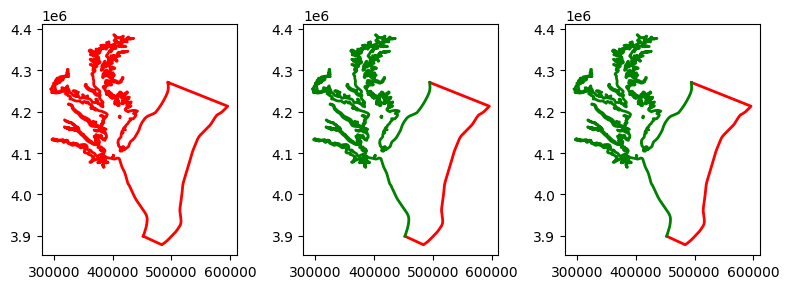

In [183]:
#Examples 5.1.2.1.2
#usage of plot_bnd

figure(figsize=[8,3])

#method 1
subplot(1,3,1)
gd.plot_bnd(c='r',lw=2)

#method 2: red(green) line for open(land) boundary
subplot(1,3,2)
gd.plot_bnd(c='rg',lw=2)

#method 3: plot boudaries directly by refering to the segments
subplot(1,3,3)
for i in arange(gd.nob):
  sind=gd.iobn[i]; xi,yi=gd.x[sind],gd.y[sind]
  plot(xi,yi,'r-',lw=2)

for i in arange(gd.nlb):
  sind=gd.ilbn[i]; xi,yi=gd.x[sind],gd.y[sind]
  plot(xi,yi,'g-',lw=2)

gcf().tight_layout()

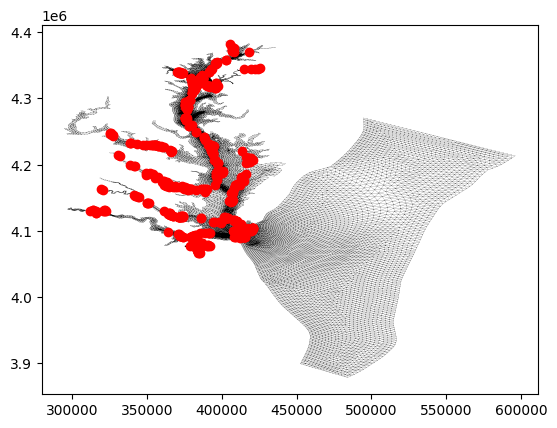

In [184]:
#Examples 5.1.2.1.3
#usage plot_bnd_quads

#find bad-quality quadrilaterals with minimum internel ange<70, or maximum angel>110
sindb=gd.check_quads(angle_min=70,angle_max=110,fname='bad_quad.bp')

#then display the locations of bad quads;
gd.plot(); plot(gd.xctr[sindb],gd.yctr[sindb],'r.',ms=12)
# gd.plot_bad_quads()  #same as above

#note: data/bad_quad.bp can be imported into SMS to improve your grid

#### **5.1.2.2. interpolation**
  * **interp_node_to_elem**: interpolate node value to element
  * **interp_elem_to_node**: interpolate element value to node
  * **compute_acor**: compute area coordinate for interpolation
  * **interp**: interpolate to get value at points
  * **inside_elem**: check whether pts are inside elements, then compute area coordinates for pts in elements
  * **inside_grid**: check whether pts are inside grid

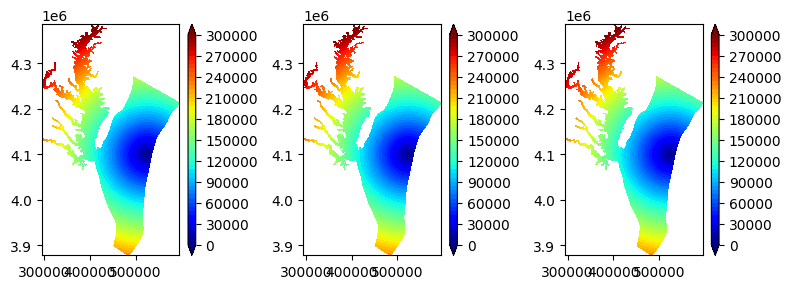

In [207]:
#Example 5.1.2.2.1
#usage of interp_node_to_elem, and interp_elem_to_node

#fake some spatial data based on dist from open boundary
pvi=abs((gd.x+1j*gd.y)-(5.25e5+1j*4.1e6))

figure(figsize=[8,3])

subplot(1,3,1)
gd.plot(fmt=1,value=pvi,clim=[0,3e5],ticks=11)

subplot(1,3,2)
evi=gd.interp_node_to_elem(value=pvi) #from node to elem
gd.plot(fmt=1,value=evi,clim=[0,3e5],ticks=11)

subplot(1,3,3)
pvii=gd.interp_elem_to_node(value=evi) #from elem to node
gd.plot(fmt=1,value=pvii,clim=[0,3e5],ticks=11)

gcf().tight_layout()

computing grid boundaries
8638999:    3.800,    3.800
8632200:    5.595,    5.595
8638901:   11.988,   11.988
8638610:    6.310,    6.310
8637689:   10.236,   10.236
8636580:    4.479,    4.479
8635750:    0.658,    0.658
8635027:    1.000,    1.000
8632837:   12.908,   12.908
8577330:    6.871,    6.871
8575512:    0.500,    0.500
8574680:    5.835,    5.835
8573927:    8.340,    8.340
8571892:    6.288,    6.288
8571421:    3.055,    3.055


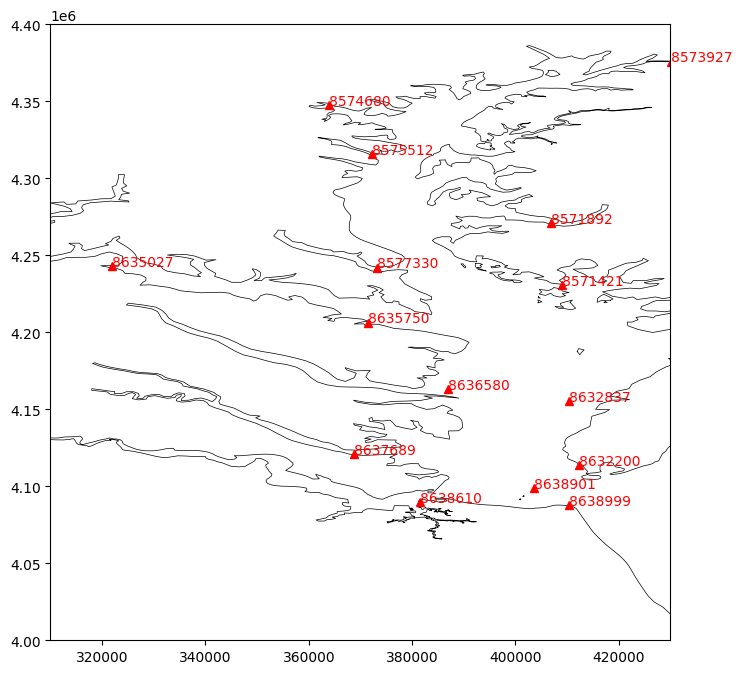

In [186]:
#Example 5.1.2.2.2
#usage of inside_grid, interp, and compute_acor

#get noaa stations inside_grid
bp=read('noaa_elev_station.bp')
xi,yi=proj_pts(bp.x,bp.y,'epsg:4326','epsg:26918')
fp=gd.inside_grid(c_[xi,yi])==1
pxi,pyi,stations=xi[fp],yi[fp],bp.station[fp]

#method 1: noaa stations
figure(figsize=[8,8])
gd.plot_bnd()
plot(pxi,pyi,'r^')
for pxii,pyii,station in zip(pxi,pyi,stations): text(pxii,pyii,station,color='r')
setp(gca(),xlim=[3.1e5,4.3e5],ylim=[4e6,4.4e6])

#interp depth at these stations (can accept other value instead of default depth)
dps1=gd.interp(c_[pxi,pyi])

#interp depths using compute_acor. where acor is area coordinates
ie,ip,acor=gd.compute_acor(c_[pxi,pyi])
dps2=(gd.dp[ip]*acor).sum(axis=1)

[print('{}: {:8.3f}, {:8.3f}'.format(i,k,m)) for i,k,m in zip(stations,dps1,dps2)];

#### **5.1.2.3. geometry**
refer to [link](#gd_attr) for the explaination of attributes
  * **compute_all**: compute all geometry information of hgrid by invoking `compute_ctr(),compute_area(),compute_side(fmt=2),compute_nne(fmt=1),compute_ic3()`
  * **compute_ctr**: compute element center information: `xctr,yctr,dpe`
  * **compute_area**: compute element area: `area`  
  * **compute_side**: compute side info: `ns,isidenode,isdel,xcj,ycj,dps,distj`  
  * **compute_nne** or **compute_node_ball**: compute nodal ball information: `nne,mnei,indel,ine`
  * **compute_ic3**: compute element-to-side table: `ic3, elside`
  * **compute_gradient**: compute gradient: `dpdx,dpdy,dpdxy,dpedx,dpedy,dpedxy`
  * **compute_bnd**: compute boundary information (saved in `gd.bndinfo`)

#### **5.1.2.4. boundary**
  * **compute_bnd**: compute grid boundary information
  * **write_bnd**: write boundary information
  * **create_bnd**: a GUI for defining open and land boundaries

(note. demo here: configure open/land boundaries for SCHISM model)

#### **5.1.2.5. read**
  * **read_hgrid**: read horizontal grid
  * **read_prop**: read *.prop file

In most cases, these functions can be replaced by the generic `read` function.

In [187]:
#Example 5.1.2.5.1
#usage of read_hgrid

#the following three lines perform the same functions in reading a SCHISM hgrid
gd=read('hgrid.gr3')
gd=read_schism_hgrid('hgrid.gr3')
gd=schism_grid(); gd.read_hgrid('hgrid.gr3')

In [188]:
#Example 5.1.2.5.2
#usage of read_prop

#write a prop file (element based values)
gd.save('tvd.prop',value=1)

#the following commands return the element value of 'tvd.prop' (element-based input file)
evi=read('tvd.prop')
evi=gd.read_prop('tvd.prop')

#### **5.1.2.6. save**
  * **save**: save horizontal grid with different format (alias to **gd.write**)
  * **write_hgrid**: save horizontal grid in *.gr3 format
  * **write_prop**: write *.prop file

**`gd.save`** is a generic function to save grid as different format: `*.gr3, *.ll, *.ic, *.prop, *.npz, *.pkl, *.shp, *.bnd` <br>

  1. `gd.save('grid.npz')`  or `gd.write('grid')`
  2. `gd.save('grid.pkl')`
  3. `gd.write('hgrid.gr3')` or `gd.write('hgrid.ll')` or `gd.write('temp.ic',value=5)`
  4. `gd.save('tvd.prop',value=1)`
  5. `gd.save('grid.bnd')`


In [189]:
#Example 5.1.2.6.1
#usage of save: save hgrid in different format

#method 1: save as *.npz
gd.save('hgrid.npz')
# or gd.save('data/hgrid')

#method 2: save as *.pkl
gd.save('hgrid.pkl')

#to read hgrid.npz or hgrid.pkl (hgrd.pkl reads much faster)
t0=time.time(); gd=loadz('hgrid.npz').hgrid; dt1=time.time()-t0
t0=time.time(); gd=loadz('hgrid.pkl').hgrid; dt2=time.time()-t0
print(' reading hgrid.npz: {} s\n reading hgrid.pkl: {} s'.format(dt1,dt2))

#method 3: save as *.gr3, *.ll and *.ic format
#for these formats, gd.save is alias of gd.write_hgrid (see below)

 reading hgrid.npz: 0.02132415771484375 s
 reading hgrid.pkl: 0.003342866897583008 s


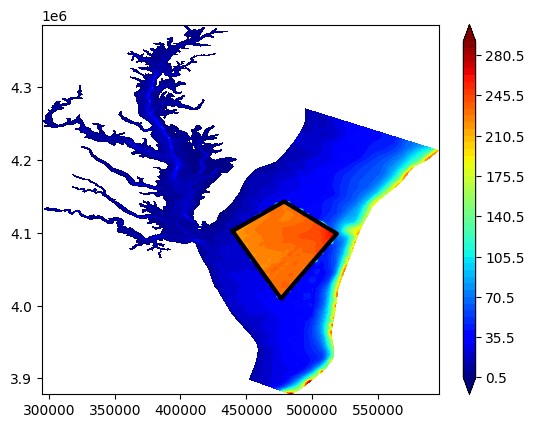

In [190]:
#Example 5.1.2.6.2
#usage of write_hgrid: save hgrid in *.gr3, *.ll and *.ic format

#method 1: if value is not given, gd.dp is used for default value
gd.write_hgrid('tmp.gr3')
gd.write_hgrid('tmp.ll')
gd.write_hgrid('tmp.ic')
# gd.save('tmp.gr3'); gd.save('tmp.ll'); gd.save('tmp.ic') #easier way

#method 2: value=constant
gd.write_hgrid('tmp2.gr3',value=0.1)  #gd.save('tmp2.gr3',value=0.1)

#method 3-1: value is array
pvi=arange(gd.np)/gd.np
gd.write_hgrid('tmp3.gr3',value=pvi)  #gd.save('tmp3.gr3',value=pvi)

#method 3-2: change value in region.
bp=read('CS.reg')
sindp=inside_polygon(c_[gd.x,gd.y],bp.x,bp.y)==1
pvi=gd.dp.copy(); pvi[sindp]=pvi[sindp]+200
gd.write_hgrid('tmp4.gr3',value=pvi) #gd.save('tmp4.gr3',value=pvi)

#plot
gd.plot(fmt=1,value=pvi)
pxi,pyi=close_data_loop(c_[bp.x,bp.y]).T
plot(pxi,pyi,'k-',lw=3)

In [191]:
#Example 5.1.2.6.3
#usage of write_prop: write *.prop file

#method 1: if value is not given, gd.dpe is used for default value
gd.write_prop('tmp1.prop')  #gd.save('tmp1.prop')

#method 2: value=const
gd.write_prop('tmp2.prop',value=5) #gd.save('tmp2.prop',value=5)

#method 3: value=array[gd.ne]
gd.write_prop('tmp3.prop',value=10*ones(gd.ne))  #gd.save('tmp3.prop',value=10*ones(gd.ne))

#### **5.1.2.7. grid manipulation**
  * **grd2sms**: convert grid to SMS format and save *.2dm
  * **split_quads**: split quads with criteria
  * **check_quads**: check quads' quality
  * **check_skew_elems**: check skew elements
  * **proj**: tranform grid's coordinate

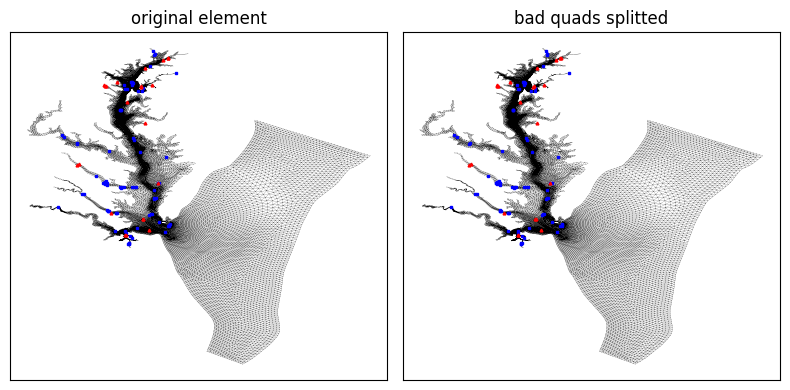

In [206]:
#Example 5.1.2.7.1
#pre-processing grid

#convert 2dm to gr3
sms2grd('CB.2dm','CB0.gr3')

#convert to ll
gd=read('CB0.gr3')
gd.lon,gd.lat=gd.proj('epsg:26918',fmt=1) #same as below
# gd.lon,gd.lat=proj_pts(gd.x,gd.y,'epsg:26918','epsg:4326')

#check skew elements (Note, all paramters are optional)
gd.check_quads(angle_ratio=0.5,angle_min=60, angle_max=120, fname='CB_bad_quad.bp')
gd.check_skew_elems(threshold=10, angle_min=15, fname='CB_skew_elem.bp')

#split quads
gd.split_quads(angle_min=60, angle_max=120, fname='CB.gr3')

#save grid infomation
gd=read('CB.gr3'); gd.save('grid.npz')

#plot
gd0=read('CB0.gr3')
gd=read('grid.npz').hgrid
sbp=read('CB_skew_elem.bp')
qbp=read('CB_bad_quad.bp')

figure(figsize=[8,4])
subplot(1,2,1)
gd0.plot()
plot(qbp.x,qbp.y,'bs',ms=2)
plot(sbp.x,sbp.y,'r^',ms=2)
setp(gca(),xticks=[],yticks=[])
title('original element')
# setp(gca(),xlim=[3.9e5,4.11e5],ylim=[4.1075e6,4.125e6])

subplot(1,2,2)
gd.plot()
plot(qbp.x,qbp.y,'bs',ms=2)
plot(sbp.x,sbp.y,'r^',ms=2)
setp(gca(),xticks=[],yticks=[])
title('bad quads splitted')
# setp(gca(),xlim=[3.9e5,4.11e5],ylim=[4.1075e6,4.125e6])

gcf().tight_layout()

#### **5.1.2.8. shapefile**
  * **write_shp**: generic function to write shapefile (gd.read is an alias)
  * **write_shapefile_bnd**: output grid's boundary as shpfile
  * **write_shapefile_node**: output grid's node as shpfile
  * **write_shapefile_element**: output grid's element as shpfile

In [193]:
#Example 5.1.2.8.1
#usage of write_shape_*:

#read hgrid
gd=read('hgrid.gr3')

# #write shapefiles for elements, nodes and boundary
gd.save('hgrid_elem.shp',fmt=0,prj='epsg:26918') # same as gd.write_shapefile_element('hgrid_elem',prj='epsg:26918')
gd.save('hgrid_node.shp',fmt=1,prj='epsg:26918') # same as gd.write_shapefile_node('hgrid_node',prj='epsg:26918')
gd.save('hgrid_bnd.shp',fmt=2,prj='epsg:26918')  # same as gd.write_shapefile_bnd('hgrid_bnd',prj='epsg:26918')

## **5.2. vgrid**
* **schism_vgrid**: class of vertical grid
* **read_schism_vgrid**: read vgrid, and return object of schism_vgrid class    
* **compute_zcor**: compute z-coordinates

(1, 27075, 55, array([48, 46, 49, ..., 47, 47, 48]))

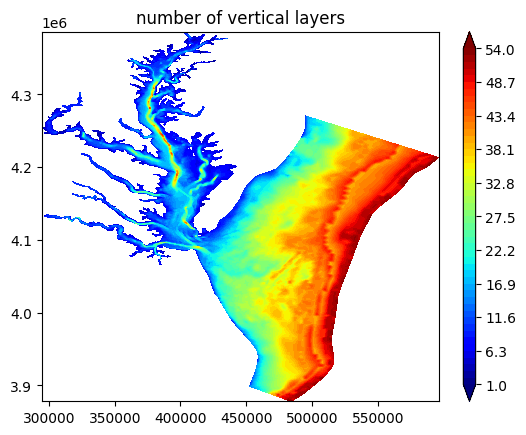

In [194]:
#Examples 5.2.1
#usgae of read_schism_vgrid and compute_zcor

#read SCHISM vertical grid
vd=read('vgrid.in') #same as vd=read_schism_vgrid('vgrid.in')

#method=1: compute z-coordinate for all nodes
zcor1=vd.compute_zcor(gd.dp)

#method=2: compute z-coordinate for all nodes with 1m elevation
zcor2=vd.compute_zcor(gd.dp,eta=1) #or eta=ones(gd.np)

#plot number of vertical layer in space
nlayer=vd.nvrt-vd.kbp-1
gd.plot(fmt=1,value=nlayer,clim=[1,vd.nvrt-1],ticks=11)
title('number of vertical layers')

#print vgrid attribute
vd.ivcor,vd.np,vd.nvrt,vd.kbp
# zcor1[0], zcor2[0]


Text(0.5, 0, 'distance from 1st node (km)')

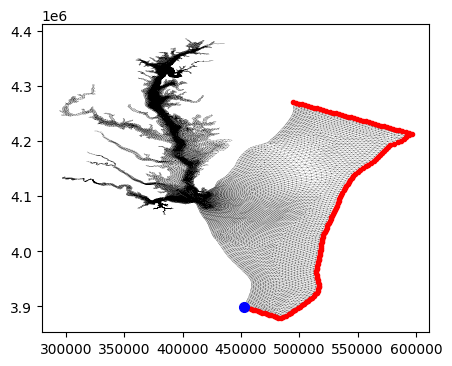

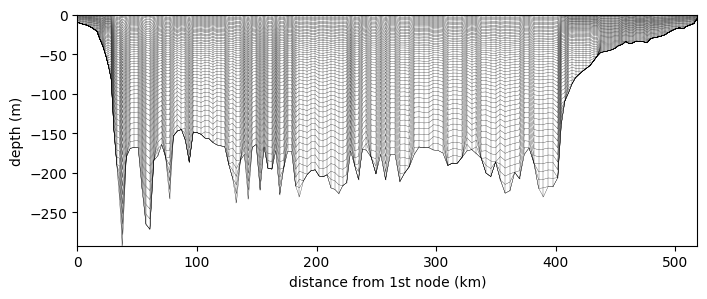

In [195]:
#Examples 5.2.2: compute vertical grid at subsets of grid nodes

#read hgrid and vgrid
gd=read('hgrid.gr3')
vd=read('vgrid.in')

#get boundary nodes index
sindb=gd.iobn[0]
zb=compute_zcor(vd.sigma[sindb],gd.dp[sindb])

#plot boundary vertical grid
figure(figsize=[5,4])
gd.plot(lw=0.1); plot(gd.x[sindb],gd.y[sindb],'r.-')
plot(gd.x[sindb[0]],gd.y[sindb[0]],'b.',ms=14);

figure(figsize=[8,3])
bxy=gd.x[sindb]+1j*gd.y[sindb]; dist=cumsum(r_[0, abs(diff(bxy))])
for zbi in zb.T: plot(dist/1e3,zbi,'k-',lw=0.2)
for disti,zbi in zip(dist,zb): plot(ones(vd.nvrt)*disti/1e3,zbi,'k',lw=0.2)
setp(gca(),xlim=[0,dist.max()/1e3],ylim=[zb.min(),0]);
ylabel('depth (m)'); xlabel('distance from 1st node (km)')

##  **5.3. save hgrid and vgrid**
For working with SCHISM model, it is recommended to save grid information in *.npz (or *.pkl) format.  
* **save_schism_grid**: save grids (`hgrid.gr3, hgrid.ll, vgrid.in`) in *.npz file (not all grid files are required to run this function)

In [196]:
#Example 5.3.1
#usage of save_schism_grid

#method 1: read and save grid information
save_schism_grid()
#save_schism_grid() #same as above if executed this command in data

#method 2: read and save grid information (same as above)
gd=read('hgrid.gr3'); gd.lon,gd.lat=gd.proj('epsg:26918',fmt=1)
vd=read('vgrid.in')
s=zdata(); s.hgrid=gd; s.vgrid=vd; s.save('grid')


## **5.4. ACE bp/reg file**
ACE bp/reg file refers to a series of points, where reg file assumes a polygon with points as its vertices.
* **schism_bpfile**: class of points
* **read_schism_bpfile**: read point information from ACE/gredit bpfile
* **read_schism_reg**: read point information from ACE/gredit regfile

In [197]:
#Example 5.4.1
#usage of schism_bpfile: create a bpfile/reg and save it

#fake some data
npt=10; xi=linspace(0,pi,npt); yi=sin(xi); zi=arange(npt)

#create bpfile
bp=schism_bpfile(); bp.x,bp.y,bp.z=xi,yi,zi
# bp.station=['{}'.format(i+1) for i in arange(npt)] #can append stations for each pts

#write bpfile and reg file
bp.save('tmp5.bp')
bp.save('tmp5.reg') #same as bp.write_bpfile('data/tmp5.reg',fmt=1)

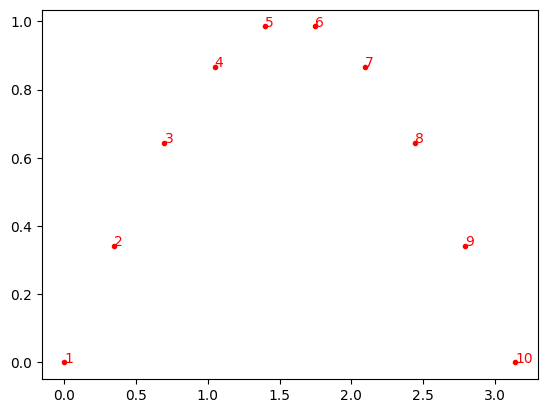

In [198]:
#Example 5.4.2
#usage of read_schism_bpfile and read_schism_reg

#read file
bp=read('tmp5.bp') #same as bp=read_schism_bpfile('tmp5.bp')
reg=read('tmp5.reg') #same as reg=read_schism_reg('tmp5.reg')

#write shapefile
bp.save('tmp5.shp',prj='epsg:4326') #same as bp.write_shapefile('tmp5','epsg:4326')

#plot
bp.plot_station();

##  **5.5. interpolation**
`interp_schism_3d` is used to interp multiple 3D variables at the same time. This functionality is still under development. It is not very easy to use, but you can try it now.
* **interp_schism_3d**: 3D interpolation for multiple variables

##  **5.6. schism parameter**
* **read_schism_param**: read parameters from inputs files (e.g.s. param.nml, param.in, cosine.in)
* **write_schism_param**: write parameters files

In [199]:
#Example 5.6.1
#usage of read_schism_param and write_schism_param

#read parameter
p1=read_schism_param('param.nml')       #dictionay,
p2=read_schism_param('param.nml',fmt=1) #dictionay, convert string to float
p3=read_schism_param('param.nml',fmt=3) #zdata, convert string to number

#write parameter file
p2['nws']=0
write_schism_param('param.nml.changed',p2)

#change parameter value in situ
chparam('param.nml','rnday',500)

##  **5.7. grid generation**
* **sms2grd**: convert `*.2dm` to `*.gr3`
* **grd2sms**: convert `*.gr3` to `*.2dm`
* **scatter_to_schism_grid**: create a horizontal grid from scatter points
* **delete_schism_grid_element**: remove hgrid's elements based on conditions
* **create_schism_vgrid**: create a vertical grid

In [200]:
#Example 5.7.1
#usage of sms2grd

#please refer to Example 5.1.2.7.1

In [201]:
#Example 5.7.2
#usgae of grd2sms:
grd2sms('CB.gr3','tmp.2dm')

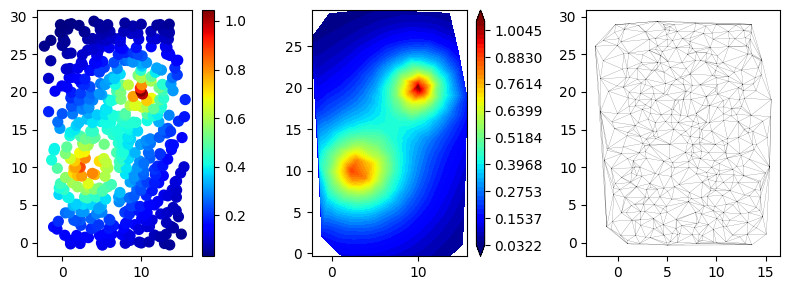

In [205]:
#Example 5.7.3
#usage of scatter_to_schism_grid

#fake some data
xi,yi=meshgrid(arange(15),arange(30)); npt=xi.size
xi,yi=xi.ravel(),yi.ravel() #convert 2D array to 1D array
xi=xi+randn(npt); yi=yi+randn(npt)/5  #add some random shift
zi=exp(-abs((xi+1j*yi)-(3+1j*10))/5)+exp(-abs((xi+1j*yi)-(10+1j*20))/3)

#create schism grid
gd=scatter_to_schism_grid(c_[xi,yi,zi])
# gd=scatter_to_schism_grid(c_[xi,yi,zi],angle_min=10)

#plots
figure(figsize=[8,3]); set_cmap('jet')

subplot(1,3,1)
scatter(xi,yi,s=50,c=zi); colorbar()

subplot(1,3,2)
gd.plot(fmt=1)

subplot(1,3,3)
gd.plot()

gcf().tight_layout()

In [203]:
#Example 5.7.4
#usage of create_schism_vgrid

#method 1: pure S
create_schism_vgrid('vgrid.in.1',nvrt=15)

#method 2: SZ
nvrt=54
zlevels=[-5e3,-2300,-1800,-1400,-1000,-770,-570,-470,-390,-340,
         -290,-240,-190,-140,-120,-100,-105,-100]
h_c, theta_b, theta_f=30.0, 0.7, 5.0
create_schism_vgrid('vgrid.in.2',nvrt=nvrt,zlevels=zlevels,
                    h_c=h_c,theta_b=theta_b,theta_f=theta_f)

#ivcor=1: LSC^2
#this functionality is still under development

## **5.8. post-processing**
These functions below are normally used for post-processing SCHISM model results. However, they are probably not needed for the lastest format of SCHISM outputs.
* **getglob**: get global information about schism run (ne,ns,np,nvrt,nproc,ntracers,ntr)
* **srank**: return string of schism rank number ('0032', or '000032')
* **read_schism_local_to_global**: read schism partition information


# **6. Scripts based on Pylibs**

In pylibs/pyScripts, many sample scripts using pylibs are shared for different purposes. Some of these scripts are outdated, or need to be modified under your enviroment. The key is that the algorithms triumph others, and you can change them to suit for your needs.

## **6.1. SCHISM Job Management**
* file strcutures: 1). readme, 2). runDir, 3). inputDir, 4). gridDir, 5).databsae,5). resultsDir, 6). SCHISM code  (demo)
* `checkrun.py`: check run status and progress
* `cmake_schism.py`: compile schism code with git version record
* `copy_run.py`: use to set up run
* `Dparam.py`: read parameters
* `run.schism`: submit jobs


## **6.2. Pre-Processing**
* `gen_bctides.py`: generate bctides.in with harmonics
* `gen_hycom_3Dth.py`: generate SCHISM inputs (`elev2D.th.nc`,`TEM_3D.th.nc`,`SAL_3D.th.nc`,`uv3D.th.nc`) based on HYCOM model
* `gen_hycom_hotstart.py`: generate SCHISM `hotstart.nc` based on HYCOM model
* `gen_hycom_nudge.py`: generate SCHISM nudge inputs (`TEM_nu.nc`,`SAL_nu.nc`) based on HYCOM model
* `gen_fluxflag.py`: generate `fluxflag.prop` based on ACE regions
* `gen_narr_sflux.py`: generate narr database
* `gen_vqs.py`: generate SCHISM LCS$^2$ coordinates
* `make_sflux_links.py`: generate `sflux` direcotry for SCHISM model
* `make_sflux_subdomain.py`: used to shrink sflux files
* `pload_depth.py`: script to interpodate DEM onto SCHISM grid.

## **6.3 Post-Processing**
* `pextract_schism_fabm_xyz.py`: extract time series at (x,y,z) from FABM model results
* `pextract_schism_slab.py`: extract slabs from SCHISM model results
* `pextract_schism_tide.py`: perform HA for SCHISM model results (co-tidal charts)
* `pextract_schism_xyz.py`: extract time series at (x,y,z) from SCHISM model results
* `pcompute_flux.py`: compute fluxes from SCHISM results
* `run.cmb_outputs`: used to combine SCHISM outputs
* `run.cmb_hotstart`: used to combine SCHISM hotstart

## **6.4 parallel program using pylib**
pylibs provides a framewor for parallel programing, but it needs configration on each system. If users are interested, you can contact us for more information on how to build up the framework on your local machine.

# **7. List of Fucntions/Classes in pylib module**  <a name="LoF"></a>

* **pylib module** includes two submodules: **mylib** and **schism_file**.
* **mylib** contains all self-defined functions for general purpose
* **schism_file** contains all self-defined functions related to SCHISM


## **7.1. mylib**
* data capsule
  * **zdata**: an empty class with its attributs used to store data/object
  * **savez**: save zdata as a numpy dataset (*.npz format)
  * **loadz**: load zdata

* time manipulation
  * **datenum**: convert date-time to a date number
  * **get_xtick**: generate xticks and xticklables for plotting
  * **find_cs**: use to identily locations of data gaps in a time series
  * **daytime_length**: compute daytime length based on latitude and day_of_year

* data analysis
  * **lpfilt**: low-pass filter
  * **smooth**: smooth function
  * **mfft**: Perform FFT for a time series
  * **get_stat**: return frequently used statistics
  * **least_square_fit**: perform least square function

* harmonic analysis
  * **harmonic_analysis**: get tidal harmonic consituents from time sereis
  * **harmonic_fit**: use harmonic consituents to compute time series

* netcdf
  * **ReadNC**: read netcdf file content as zdata format
  * **WriteNC**: write netcdf file content

* projection:
  * **proj**: convert coordinates between different projections
  * **proj_pts**: convert coordinates of points between different projections
  * **get_prj_file**: get string of projection file (*.prj)

* shapefile
  * **read_shapefile_data**: read shapefile as zdata format
  * **write_shapefile_data**: write shapefile

* geometry related
  * **inside_polygon**: identify the points inside a polygon
  * **near_pts**: find the indices of nearest points

* DEM related
  * **convert_dem_format**: convert DEM file in *.asc format to *.npz format
  * **load_bathymetry**: interoplated DEM data to points
  * **compute_contour**: extract contours from a 2D data

* plot
  * **plot_taylor_diagram**: a function to play taylor diagram
  * **get_subplot_position**: get axes of subplots
  * **move_figure**: move figure to certain position

* system related
  * **command_outputs**: run a system command, and grab the outpus
  * **get_hpc_command**: get commands for submmitting or running HPC jobs.

* misc
  * **rewrite**: function to rewrite file in-situ based on conditions
  * **rewrite_input**: function to rewrite the inputs in job-submit scripts
  * **read_yaml**: read parameter in yaml file
  * **mdivide**: perform matrix division B/A
  * **signa**: compute signed area for triangles
  * **close_data_loop**: if xi[0,...]!=xi[-1,...], then,add xi[0,...] in the end
  * **convert_matfile**: convert matlab file (*.mat) to zdata (*.npz)
  * **get_hycom**: extract Hycom time series at stations (maybe outdated)


## **7.2. schism_file**
  * hgrid
    * **schism_grid**: class of horizontal grid
    * **read_schism_hgrid**: read hgrid.gr3, and return object of schism_grid class
  * vgrid
    * **schism_vgrid**: class of vertical grid
    * **read_schism_vgrid**: read vgrid, and return object of schism_vgrid class    
    * **compute_zcor**: compute z-coordinates
  * save hgrid and vgrid
    * **save_schism_grid**: save grids (hgrid.gr3, hgrid.ll, vgrid.in) in *.npz file
  * interpolation
    * **interp_schism_3d**: 3D interpolation for multiple variables
  * ACE bp/reg file
    * **schism_bpfile**: class of points
    * **read_schism_bpfile**: read point information from ACE/gredit bpfile
    * **read_schism_reg**: read point information from ACE/gredit regfile
  * schism parameter
    * **read_schism_param**: read parameters from inputs files (e.g.s. param.nml, param.in, cosine.in)
    * **write_schism_param**: write parameters files
  * grid generation
    * **sms2grd**: convert *.2dm to *.gr3
    * **grd2sms**: convert *.gr3 to *.2dm
    * **scatter_to_schism_grid**: create a horizontal grid from scatter points
    * **delete_schism_grid_element**: remove hgrid's elements based on conditions
    * **create_schism_vgrid**: create a vertical grid
  * post-processing
    * **getglob**: get global information about schism run (ne,ns,np,nvrt,nproc,ntracers,ntr)
    * **srank**: return string of schism rank number ('0032', or '000032')
    * **read_schism_local_to_global**: read schism partition information

  




##  **7.3. attributes of hgrid**
* **3.1. node**
  * **np**: numbers of nodes
  * **x**, **y**, **dp**: x&y coordinates and depth
  * **lon**, **lat**: longitude&latitude (may not exist)
* **3.2 element**
  * **np**: numbers of elements
  * **i34**: element types
  * **elnode**: element to node table
  * **xctr**, **yctr**, **dpe**: the x&y coordinates and depth at element center
  * **area**: element area
  * **elside**: element to side table
  * **ic3**: element-side-element table
* **3.3 side**
  * **ns**: numbers of sides
  * **isidenode**: side to node table
  * **isdel**: side to element table
  * **xcj**, **ycj**, **dps**: the x&y coordinates and depth at side center
  * **distj**: side length
* **3.4 node ball**
  * **mnei**:  maximum number of elements in nodal ball
  * **nne**:   number of elements in nodal ball
  * **indel**: indices for each nodal ball
  * **ine**:   indices for each nodal ball, but with maxtrix shape=[np,mnei]
* **3.5 bnoundary**
  * **nob**: number of open boundary segments
  * **nobn**: number of nodes on each open boundary segment
  * **iobn**: node indices of each open boundary segment
  * **nlb**: number of land boundary segments
  * **nlbn**: number of nodes on each land boundary segment  
  * **ilbn**: node indices of each land boundary segment
  * **island**: flag for wheter land boundary segment is a enclosed island
* **3.6 gradient**
  * **dpdx**: gradient along x-axis at node
  * **dpdx**: gradient along y-axis at node
  * **dpdxy**: gradient magnitude at node
  * **dpedx**: gradient along x-axis at element
  * **dpedx**: gradient along y-axis at element
  * **dpedxy**: gradient magnitude at element



## **7.4. methods of hgrid**

* **4.1. plot**
  * **plot_grid** or **plot**: plot grid and/or depth
  * **plot_bnd**: plot grid boundary
  * **plot_bad_quads**: plot locations of bad-quality quads

* **4.2. interpolation**
  * **interp_node_to_elem**: interpolate node value to element
  * **interp_elem_to_node**: interpolate element value to node
  * **compute_acor**: compute area coordinate for interpolation
  * **interp**: interpolate to get value at points
  * **inside_elem**: check whether pts are inside elements, then compute area coordinates for pts in elements
  * **inside_grid**: check whether pts are inside grid

* **4.3. geometry**
  * **compute_all**: compute all geometry information of hgrid
  * **compute_ctr**: compute element center information: xctr,yctr,dpe
  * **compute_area**: compute element area
  * **compute_bnd**: compute boundary information
  * **compute_nne** or **compute_node_ball**: compute nodal ball information: nne,mnei,indel,ine
  * **compute_ic3**: compute element-to-side table
  * **compute_gradient**: compute gradient

* **4.4. boundary**
  * **compute_bnd**: compute grid boundary information
  * **write_bnd**: write boundary information
  * **create_bnd**: a GUI for defining open and land boundaries

* **4.5. read**
  * **read_hgrid**: read horizontal grid
  * **read_prop**: read *.prop file

* **4.6. write**
  * **save**: save horizontal grid with different format
  * **write_hgrid**: save horizontal grid in *.gr3 format
  * **write_prop**: write *.prop file

* **4.7. grid manipulation**
  * **grd2sms**: convert grid to SMS format and save *.2dm
  * **split_quads**: split quads with criteria
  * **check_quads**: check quads' quality
  * **check_skew_elems**: check skew elements
  * **proj**: tranform grid's coordinate

* **4.8. shapefile**
  * **write_shapefile_bnd**: output grid's boundary as shpfile
  * **write_shapefile_node**: output grid's node as shpfile
  * **write_shapefile_element**: output grid's element as shpfile

## **7.5. attributes/methods of vgrid**
* **attributes**:
  * **ivcor**: type of vertical grid
  * **nvrt**: number of vertical layers
  * **ivcor==1**: LCS$^2$ coordinate
    * **kbp**: indices of bottom layer
    * **np**: number of nodes in hgrid.gr3
    * **sigma**: sigma coordinates (np,nvrt)
  * **ivcor==2**: SZ coorindate
    * **kz**:
    * **h_s**:
    * **ztot**:
    * **sigma**:
    * **nsig**:
    * **h_c**:
    * **theta_b**:
    * **theta_f**:
* methods:
  * **compute_zcor**: compute z-coordinate
  * **read_vgrid**: read information of vertical grid
  * **write_vgrid**: write vgrid.in in different format


## **7.6. attributes/methods of bp/reg**
* attributes
  * nsta
  * x
  * y
  * z
  * station

* methods
  * compute_acor
  * read_bpfile
  * get_unique_pts
  * plot_station
  * write_bpfile
  * write_reg
  * write_shapefile


